# Import Bibliothèque

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


##from datetime import date
import datetime

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
import random 

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from random import randrange,random


In [3]:
start_date = "2019-01-01"
end_date ="2022-02-28"

# Import Data

In [4]:
## Données des prix du carbone
Data_Carbon_Price = pd.read_excel("Price History_20220704_1155_By_Day.xlsx", sheet_name= "Sheet 1")

## Data Mix energie RTE
Data_Mix_Energy = pd.read_excel("RTE_Energie_Mix.xlsx", index_col = "Mois")

## Données des consommations électriques
Data_Conso_Electric = pd.read_excel("RTE conso elec.xlsx")


In [5]:
## Données de la météo
##Data_Meteo = pd.read_excel("Données météo.xlsx")

Data_Meteo = pd.read_excel("data_météo.xlsx", index_col ="Date Hour")

## Données du prix spot France
Data_EPEX = pd.read_excel("Spot Price France Epex.xlsx")

# Visualisation Data

In [6]:
Data_Carbon_Price.head(3)

,Exchange Date,Date Hour,Hour,Close,Net,%Chg,Open,Low,High,Volume,OI
0,2022-07-01,2022-07-01 01:00:00,01:00:00,85.19,-4.59,-0.051125,NaN,NaN,NaN,NaN,10108.0
1,2022-06-30,2022-06-30 02:00:00,02:00:00,89.78,1.85,0.021039,87.91,87.91,88.59,218.0,10040.0
2,2022-06-29,2022-06-29 01:00:00,01:00:00,87.93,0.95,0.010922,88.63,88.51,89.39,99.0,10040.0


In [7]:
Data_Carbon_Price.columns

Index(['Exchange Date', 'Date  Hour', 'Hour', 'Close', 'Net', '%Chg', 'Open',
       'Low', 'High', 'Volume', 'OI'],
      dtype='object')

In [8]:
Data_Mix_Energy.head(3)

,Mois Hours,Mois Hours.1,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,...,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique,Pompage,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
Mois,,,,,,,,,,,,,,,,,,,,,
2010-01,2010-01-01 01:00:00,2010-01-01 01:00:00.000,Données définitives,France,56542.0,40313.0,8801.0,2928.0,1690.0,4184.0,...,-652.0,-358.0,1297.0,1613.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02,2010-02-01 01:00:00,2010-02-01 01:00:00.000,Données définitives,France,50406.0,36316.0,6822.0,1893.0,1175.0,3754.0,...,-497.0,-333.0,1628.0,1752.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-03,2010-03-01 01:00:00,2010-02-02 00:59:59.995,Données définitives,France,51071.0,35984.0,7250.0,1994.0,1275.0,3981.0,...,-365.0,-360.0,1784.0,2022.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Data_Conso_Electric.head(3)

,Date Heures,Date,Months,Heures,H,Minutes,Consommation,Prévision J-1,Prévision J,Fioul,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,2018-01-01 00:00:00,2018-01-01,1.0,00:00:00,0,0.0,61127.0,56800.0,58900.0,164.0,...,5997.0,1624.0,391.0,600.0,291.0,277.0,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,2018-01-01,1.0,00:15:00,"0,010",14.4,NaN,56250.0,58300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,2018-01-01,1.0,00:30:00,0.02,28.8,59962.0,55700.0,57700.0,108.0,...,6100.0,2558.0,212.0,580.0,281.0,258.0,NaN,NaN,NaN,NaN


In [10]:
Data_Meteo.head(3)

,numer_sta,date_ancienne,date,Hour,pmer,tend,cod_tend,dd,ff,t,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
Date Hour,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,7149,20170101000000,2017-01-01,00:00:00,102900.0,-190.0,6.0,210.0,1.8,269.15,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,7149,20170101030000,2017-01-01,03:00:00,102700.0,-200.0,6.0,220.0,1.9,269.05,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 06:00:00,7149,20170101060000,2017-01-01,06:00:00,102480.0,-220.0,8.0,220.0,2.0,268.65,...,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Data_EPEX.head(3)

,Date Hours,Date,Hours,Price
0,2017-01-01 01:00:00,2017-01-01,01:00:00,58.82
1,2017-01-01 02:00:00,2017-01-01,02:00:00,58.23
2,2017-01-01 03:00:00,2017-01-01,03:00:00,51.95


In [12]:
Data_EPEX

,Date Hours,Date,Hours,Price
0,2017-01-01 01:00:00,2017-01-01,01:00:00,58.82
1,2017-01-01 02:00:00,2017-01-01,02:00:00,58.23
2,2017-01-01 03:00:00,2017-01-01,03:00:00,51.95
3,2017-01-01 04:00:00,2017-01-01,04:00:00,47.27
4,2017-01-01 05:00:00,2017-01-01,05:00:00,45.49
...,...,...,...,...
45293,2022-02-28 16:00:00,2022-02-28,16:00:00,315.51
45294,2022-02-28 17:00:00,2022-02-28,17:00:00,296.08
45295,2022-02-28 18:00:00,2022-02-28,18:00:00,271.40
45296,2022-02-28 19:00:00,2022-02-28,19:00:00,266.70


In [13]:
Data_Carbon_Price

,Exchange Date,Date Hour,Hour,Close,Net,%Chg,Open,Low,High,Volume,OI
0,2022-07-01,2022-07-01 01:00:00,01:00:00,85.19,-4.59,-0.051125,NaN,NaN,NaN,NaN,10108.0
1,2022-06-30,2022-06-30 02:00:00,02:00:00,89.78,1.85,0.021039,87.91,87.91,88.59,218.0,10040.0
2,2022-06-29,2022-06-29 01:00:00,01:00:00,87.93,0.95,0.010922,88.63,88.51,89.39,99.0,10040.0
3,2022-06-28,2022-06-28 02:00:00,02:00:00,86.98,2.39,0.028254,87.32,87.32,87.32,142.0,9899.0
4,2022-06-27,2022-06-27 01:00:00,01:00:00,84.59,1.61,0.019402,82.86,82.86,84.18,548.0,9310.0
...,...,...,...,...,...,...,...,...,...,...,...
1408,2017-01-06,2017-01-06 01:00:00,01:00:00,5.03,-0.24,-0.045541,5.39,5.04,5.39,4.0,292.0
1409,2017-01-05,2017-01-05 02:00:00,02:00:00,5.27,-0.43,-0.075439,NaN,NaN,NaN,NaN,292.0
1410,2017-01-04,2017-01-04 01:00:00,01:00:00,5.70,0.29,0.053604,5.64,5.32,5.68,45.0,292.0
1411,2017-01-03,2017-01-03 02:00:00,02:00:00,5.41,-0.70,-0.114566,NaN,NaN,NaN,NaN,256.0


In [14]:
##0 Data_Conso_Electric - interpolate 
##1 Data meteo - interpolate aussi
##2 Data_Mix_Energy
##3 Data_EPEX - ffil
##4 Data_Carbon_Price - ffil

In [15]:
Data_Mix_Energy = Data_Mix_Energy.reset_index()

In [16]:
Data_Carbon_Price

,Exchange Date,Date Hour,Hour,Close,Net,%Chg,Open,Low,High,Volume,OI
0,2022-07-01,2022-07-01 01:00:00,01:00:00,85.19,-4.59,-0.051125,NaN,NaN,NaN,NaN,10108.0
1,2022-06-30,2022-06-30 02:00:00,02:00:00,89.78,1.85,0.021039,87.91,87.91,88.59,218.0,10040.0
2,2022-06-29,2022-06-29 01:00:00,01:00:00,87.93,0.95,0.010922,88.63,88.51,89.39,99.0,10040.0
3,2022-06-28,2022-06-28 02:00:00,02:00:00,86.98,2.39,0.028254,87.32,87.32,87.32,142.0,9899.0
4,2022-06-27,2022-06-27 01:00:00,01:00:00,84.59,1.61,0.019402,82.86,82.86,84.18,548.0,9310.0
...,...,...,...,...,...,...,...,...,...,...,...
1408,2017-01-06,2017-01-06 01:00:00,01:00:00,5.03,-0.24,-0.045541,5.39,5.04,5.39,4.0,292.0
1409,2017-01-05,2017-01-05 02:00:00,02:00:00,5.27,-0.43,-0.075439,NaN,NaN,NaN,NaN,292.0
1410,2017-01-04,2017-01-04 01:00:00,01:00:00,5.70,0.29,0.053604,5.64,5.32,5.68,45.0,292.0
1411,2017-01-03,2017-01-03 02:00:00,02:00:00,5.41,-0.70,-0.114566,NaN,NaN,NaN,NaN,256.0


In [17]:
##df["Consommation"] = df["Consommation"].fillna(method = "ffill")

# Process Data

##### Process data météo

In [18]:
## 
def change_date(date) :
    
    """
        Modification du format de la date
    """    
    
    date_car = str(date)
    année = date_car[0:4] 
    mois=date_car[4:6]
    jours = date_car[6:8]
    heures = date_car[8:10]
    minutes = date_car[10:12]
    
    DATE = année + "-" + mois + "-" + jours + " " + heures + ":00:00"
    
    date = pd.to_datetime(DATE,format = "%Y/%m/%d" )
    ##date = datetime.strptime(pd.to_datetime(DATE),'%Y-%m-%d')
    
    return date

In [19]:
## Vectorization de la fonction change-date
funct = np.vectorize(change_date,otypes=[np.str0])

In [20]:
Data_Meteo = Data_Meteo.reset_index()

In [21]:
Data_Meteo = Data_Meteo.set_index("Date Hour")

In [22]:
## Traitement des données manquantes par interpolate
##Data_Meteo_reshape = Data_Meteo.fillna(Data_Meteo.interpolate())
##Data_Meteo_reshape = Data_Meteo.fillna(method = "ffill")
Data_Meteo_reshape = Data_Meteo

In [23]:
## Modification de la date et de la température celsius
##Data_Meteo_reshape["Date Reshape"] = funct(Data_Meteo["date_ancienne"])
Data_Meteo_reshape["t celsius"] = Data_Meteo["t"]-273.15

In [24]:
##Data_Meteo_reshape = Data_Meteo_reshape.set_index("Date Reshape")
##Data_Meteo_reshape = Data_Meteo_reshape.groupby(by ="date").mean()
Data_Meteo_reshape = Data_Meteo_reshape.reset_index()
Data_Meteo_reshape.head(2)

,Date Hour,numer_sta,date_ancienne,date,Hour,pmer,tend,cod_tend,dd,ff,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,t celsius
0,2017-01-01 00:00:00,7149,20170101000000,2017-01-01,00:00:00,102900.0,-190.0,6.0,210.0,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0
1,2017-01-01 03:00:00,7149,20170101030000,2017-01-01,03:00:00,102700.0,-200.0,6.0,220.0,1.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.1


#### Process Données EPEX

In [25]:
## Regroupement des données par jours
##Data_EPEX_day = Data_EPEX.groupby(by = "Date").mean()
##Data_EPEX_day = Data_EPEX_day.reset_index()

In [26]:
Data_EPEX

,Date Hours,Date,Hours,Price
0,2017-01-01 01:00:00,2017-01-01,01:00:00,58.82
1,2017-01-01 02:00:00,2017-01-01,02:00:00,58.23
2,2017-01-01 03:00:00,2017-01-01,03:00:00,51.95
3,2017-01-01 04:00:00,2017-01-01,04:00:00,47.27
4,2017-01-01 05:00:00,2017-01-01,05:00:00,45.49
...,...,...,...,...
45293,2022-02-28 16:00:00,2022-02-28,16:00:00,315.51
45294,2022-02-28 17:00:00,2022-02-28,17:00:00,296.08
45295,2022-02-28 18:00:00,2022-02-28,18:00:00,271.40
45296,2022-02-28 19:00:00,2022-02-28,19:00:00,266.70


In [27]:
Data_EPEX.rename (columns ={'Price':'Electricity Price'} , inplace = True)

In [28]:
Data_EPEX

,Date Hours,Date,Hours,Electricity Price
0,2017-01-01 01:00:00,2017-01-01,01:00:00,58.82
1,2017-01-01 02:00:00,2017-01-01,02:00:00,58.23
2,2017-01-01 03:00:00,2017-01-01,03:00:00,51.95
3,2017-01-01 04:00:00,2017-01-01,04:00:00,47.27
4,2017-01-01 05:00:00,2017-01-01,05:00:00,45.49
...,...,...,...,...
45293,2022-02-28 16:00:00,2022-02-28,16:00:00,315.51
45294,2022-02-28 17:00:00,2022-02-28,17:00:00,296.08
45295,2022-02-28 18:00:00,2022-02-28,18:00:00,271.40
45296,2022-02-28 19:00:00,2022-02-28,19:00:00,266.70


#### Process données des productions électriques

In [29]:
Data_Mix_Energy = Data_Mix_Energy[Data_Mix_Energy["Territoire"]=="France"]

In [30]:
Data_Mix_Energy.columns

Index(['Mois', 'Mois Hours', 'Mois Hours.1', 'Qualité', 'Territoire',
       'Production totale', 'Production nucléaire',
       'Production thermique totale', 'Production thermique charbon',
       'Production thermique fioul', 'Production thermique gaz',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies', 'Consommation totale', 'Solde exportateur',
       'Echanges export', 'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique',
       'Pompage', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore'],
      dtype='object')

In [31]:
Data_Mix_Energy_ = Data_Mix_Energy[['Territoire', 'Production totale', 'Production nucléaire',
       'Production thermique totale', 'Production thermique charbon',
       'Production thermique fioul', 'Production thermique gaz',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies', 'Consommation totale', 'Solde exportateur']]
Data_Mix_Energy_ = Data_Mix_Energy_.reset_index()
Data_Mix_Energy_.head()

,index,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur
0,0,France,56542.0,40313.0,8801.0,2928.0,1690.0,4184.0,6307.0,688.0,10.0,423.0,56342.0,-489.0
1,1,France,50406.0,36316.0,6822.0,1893.0,1175.0,3754.0,5887.0,980.0,16.0,386.0,48698.0,1008.0
2,2,France,51071.0,35984.0,7250.0,1994.0,1275.0,3981.0,6204.0,1175.0,31.0,428.0,48294.0,2044.0
3,3,France,41693.0,31294.0,3568.0,1489.0,612.0,1467.0,5684.0,731.0,45.0,370.0,38637.0,2484.0
4,4,France,39847.0,29372.0,2843.0,1097.0,504.0,1242.0,6428.0,743.0,54.0,408.0,37284.0,2075.0


In [32]:
Data_Mix_Energy['Mois Hours'] = pd.to_datetime(Data_Mix_Energy['Mois Hours'])

In [33]:
##Data_Mix_Energy_['date'] = pd.to_datetime(Data_Mix_Energy_['Mois'])
##Data_Mix_Energy_= Data_Mix_Energy_.set_index('date')
##Data_Mix_Energy_
##df =Data_Mix_Energy.resample("1H").mean()

#### Process données des consommations

In [34]:
Data_Conso_Electric_reshape = Data_Conso_Electric

In [35]:
##Data_Conso_Electric_reshape = Data_Conso_Electric_reshape.set_index("Date Heures")

In [36]:
##Data_Conso_Electric_reshape.columns

In [37]:
## Data
##Data_Conso_Electric_reshape = Data_Conso_Electric.reset_index()
##Data_Conso_Electric_reshape = Data_Conso_Electric_reshape.drop(columns=["index","Heures"])

##Data_Conso_Electric_reshape = Data_Conso_Electric_reshape.groupby(by = "Date").sum()
##Data_Conso_Electric_reshape = Data_Conso_Electric_reshape.reset_index()

##Data_Conso_Electric_reshape = Data_Conso_Electric_reshape.fillna(Data_Conso_Electric_reshape.interpolate())

#### Process données carbon price

In [38]:
Data_Carbon_Price = Data_Carbon_Price.set_index('Exchange Date')

In [39]:
Data_Carbon_Price.rename(columns = {'Close':'Carbon Price'}, inplace = True)

In [40]:
Data_Carbon_Price

,Date Hour,Hour,Carbon Price,Net,%Chg,Open,Low,High,Volume,OI
Exchange Date,,,,,,,,,,
2022-07-01,2022-07-01 01:00:00,01:00:00,85.19,-4.59,-0.051125,NaN,NaN,NaN,NaN,10108.0
2022-06-30,2022-06-30 02:00:00,02:00:00,89.78,1.85,0.021039,87.91,87.91,88.59,218.0,10040.0
2022-06-29,2022-06-29 01:00:00,01:00:00,87.93,0.95,0.010922,88.63,88.51,89.39,99.0,10040.0
2022-06-28,2022-06-28 02:00:00,02:00:00,86.98,2.39,0.028254,87.32,87.32,87.32,142.0,9899.0
2022-06-27,2022-06-27 01:00:00,01:00:00,84.59,1.61,0.019402,82.86,82.86,84.18,548.0,9310.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-06,2017-01-06 01:00:00,01:00:00,5.03,-0.24,-0.045541,5.39,5.04,5.39,4.0,292.0
2017-01-05,2017-01-05 02:00:00,02:00:00,5.27,-0.43,-0.075439,NaN,NaN,NaN,NaN,292.0
2017-01-04,2017-01-04 01:00:00,01:00:00,5.70,0.29,0.053604,5.64,5.32,5.68,45.0,292.0


In [41]:
##Data_Carbon_Price = Data_Carbon_Price.fillna(Data_Carbon_Price.interpolate())
##Data_Carbon_Price = Data_Carbon_Price.sort_values(by = "Exchange Date" )
##Data_Carbon_Price['Carbon Price'] = Data_Carbon_Price['Close']
Data_Carbon_Price.head()

,Date Hour,Hour,Carbon Price,Net,%Chg,Open,Low,High,Volume,OI
Exchange Date,,,,,,,,,,
2022-07-01,2022-07-01 01:00:00,01:00:00,85.19,-4.59,-0.051125,NaN,NaN,NaN,NaN,10108.0
2022-06-30,2022-06-30 02:00:00,02:00:00,89.78,1.85,0.021039,87.91,87.91,88.59,218.0,10040.0
2022-06-29,2022-06-29 01:00:00,01:00:00,87.93,0.95,0.010922,88.63,88.51,89.39,99.0,10040.0
2022-06-28,2022-06-28 02:00:00,02:00:00,86.98,2.39,0.028254,87.32,87.32,87.32,142.0,9899.0
2022-06-27,2022-06-27 01:00:00,01:00:00,84.59,1.61,0.019402,82.86,82.86,84.18,548.0,9310.0


Text(0, 0.5, '€/Tons')

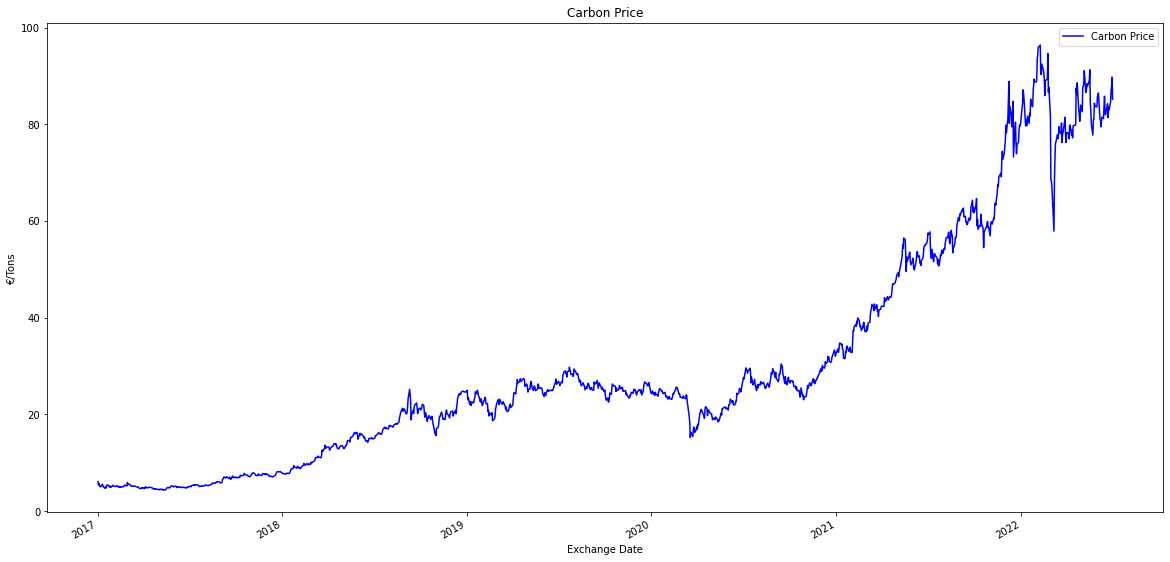

In [42]:
Data_Carbon_Price["Carbon Price"].plot(figsize = (20,10), color = 'blue')
plt.legend()
plt.title("Carbon Price")
plt.ylabel("€/Tons")

# Selection des colonnes

#### Meteo

In [43]:
Data_Meteo_reshape.columns

Index(['Date Hour', 'numer_sta', 'date_ancienne', 'date', 'Hour', 'pmer',
       'tend', 'cod_tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'ww', 'w1', 'w2',
       'n', 'nbas', 'hbas', 'cl', 'cm', 'ch', 'pres', 'niv_bar', 'geop',
       'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol', 'sw', 'tw',
       'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige', 'ssfrai', 'perssfrai',
       'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1', 'phenspe2', 'phenspe3',
       'phenspe4', 'nnuage1', 'ctype1', 'hnuage1', 'nnuage2', 'ctype2',
       'hnuage2', 'nnuage3', 'ctype3', 'hnuage3', 'nnuage4', 'ctype4',
       'hnuage4', 't celsius'],
      dtype='object')

In [44]:
colonnes_meteo = ['Date Hour','dd',"t celsius",'ff','n','geop','rafper','per','etat_sol','rr1', 'rr3', 'rr6', 'rr12', 'rr24']
Data_Meteo = Data_Meteo_reshape[colonnes_meteo]

#### Data mix 

In [45]:
Data_Mix_Energy.head(2)

,Mois,Mois Hours,Mois Hours.1,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,...,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique,Pompage,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,2010-01,2010-01-01 01:00:00,2010-01-01 01:00:00,Données définitives,France,56542.0,40313.0,8801.0,2928.0,1690.0,...,-652.0,-358.0,1297.0,1613.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02,2010-02-01 01:00:00,2010-02-01 01:00:00,Données définitives,France,50406.0,36316.0,6822.0,1893.0,1175.0,...,-497.0,-333.0,1628.0,1752.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
Data_Mix_Energy = Data_Mix_Energy.reset_index()

In [47]:
Data_Mix_Energy.columns

Index(['index', 'Mois', 'Mois Hours', 'Mois Hours.1', 'Qualité', 'Territoire',
       'Production totale', 'Production nucléaire',
       'Production thermique totale', 'Production thermique charbon',
       'Production thermique fioul', 'Production thermique gaz',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies', 'Consommation totale', 'Solde exportateur',
       'Echanges export', 'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique',
       'Pompage', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore'],
      dtype='object')

In [48]:
colonnes_Mix = ["Mois Hours",'Production totale','Production nucléaire','Production hydraulique', 
                'Production éolien', 'Production solaire','Production bioénergies', 'Consommation totale']

In [49]:
Data_Prod_Energy= Data_Mix_Energy[colonnes_Mix]

In [50]:
Data_Prod_Energy

,Mois Hours,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale
0,2010-01-01 01:00:00,56542.0,40313.0,6307.0,688.0,10.0,423.0,56342.0
1,2010-02-01 01:00:00,50406.0,36316.0,5887.0,980.0,16.0,386.0,48698.0
2,2010-03-01 01:00:00,51071.0,35984.0,6204.0,1175.0,31.0,428.0,48294.0
3,2010-04-01 01:00:00,41693.0,31294.0,5684.0,731.0,45.0,370.0,38637.0
4,2010-05-01 01:00:00,39847.0,29372.0,6428.0,743.0,54.0,408.0,37284.0
...,...,...,...,...,...,...,...,...
138,2021-07-01 01:00:00,40555.0,28449.0,5626.0,2295.0,1686.0,892.0,32959.0
139,2021-08-01 01:00:00,39162.0,29010.0,4408.0,2213.0,1713.0,857.0,31184.0
140,2021-09-01 01:00:00,38505.0,29001.0,3417.0,1651.0,1421.0,815.0,32350.0
141,2021-10-01 01:00:00,41695.0,30658.0,3092.0,2807.0,703.0,812.0,36762.0


#### Consommation

In [51]:
##Data_Conso_Electric_reshape

In [52]:
Data_Conso_Electric_reshape = Data_Conso_Electric_reshape.reset_index()
Data_Conso_Electric_reshape.columns

Index(['index', 'Date Heures', 'Date', 'Months', 'Heures', 'H', 'Minutes',
       'Consommation', 'Prévision J-1', 'Prévision J', 'Fioul', 'Charbon',
       'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies', 'Ech. physiques', 'Taux de Co2', 'Ech. comm. Angleterre',
       'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse',
       'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.',
       'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG',
       'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée',
       'Hydraulique - Lacs', 'Hydraulique - STEP turbinage',
       'Bioénergies - Déchets', 'Bioénergies - Biomasse',
       'Bioénergies - Biogaz', ' Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore'],
      dtype='object')

In [53]:
colonne_conso_elec = ['Date Heures','Months','Minutes','Consommation','Nucléaire', 'Eolien', 
                      'Solaire', 'Hydraulique','Bioénergies','Gaz']

In [54]:
Data_Conso_Electric  = Data_Conso_Electric_reshape[colonne_conso_elec]

In [55]:
Data_Conso_Electric

,Date Heures,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz
0,2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0
1,2018-01-01 00:15:00,1.0,14.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,1.0,28.80,59962.0,37564.0,10684.0,0.0,8870.0,1120.0,2471.0
3,2018-01-01 00:45:00,1.0,44.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,1.0,59.04,57879.0,35725.0,10660.0,0.0,8585.0,1118.0,2474.0
...,...,...,...,...,...,...,...,...,...,...
154751,2022-05-31 23:45:00,5.0,1424.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154752,2022-06-02 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154753,2022-06-03 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154754,2022-06-04 02:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Carbon Price

In [56]:
Data_Carbon_Price.head(3)

,Date Hour,Hour,Carbon Price,Net,%Chg,Open,Low,High,Volume,OI
Exchange Date,,,,,,,,,,
2022-07-01,2022-07-01 01:00:00,01:00:00,85.19,-4.59,-0.051125,NaN,NaN,NaN,NaN,10108.0
2022-06-30,2022-06-30 02:00:00,02:00:00,89.78,1.85,0.021039,87.91,87.91,88.59,218.0,10040.0
2022-06-29,2022-06-29 01:00:00,01:00:00,87.93,0.95,0.010922,88.63,88.51,89.39,99.0,10040.0


In [57]:
Data_Carbon_Price = Data_Carbon_Price.reset_index()
Data_Carbon_Price.head(3)
Data_Carbon_Price['date'] = Data_Carbon_Price['Exchange Date']

In [58]:
colonnes_carbon = ['Date  Hour','Carbon Price']

In [59]:
Data_Carbon = Data_Carbon_Price[colonnes_carbon]

# Gestion des valeurs manquantes

#### Data Meteo


In [60]:
Data_Meteo.head()

,Date Hour,dd,t celsius,ff,n,geop,rafper,per,etat_sol,rr1,rr3,rr6,rr12,rr24
0,2017-01-01 00:00:00,210.0,-4.0,1.8,100.0,NaN,2.9,-10.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 03:00:00,220.0,-4.1,1.9,100.0,NaN,3.1,-10.0,4.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 06:00:00,220.0,-4.5,2.0,100.0,NaN,3.1,-10.0,4.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 09:00:00,200.0,-3.8,2.0,100.0,NaN,2.9,-10.0,4.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 12:00:00,190.0,-1.9,1.7,100.0,NaN,3.5,-10.0,4.0,0.0,-0.1,-0.1,-0.1,-0.1


# Merge des données

In [61]:
Data_Carbon_Price.head(3)

,Exchange Date,Date Hour,Hour,Carbon Price,Net,%Chg,Open,Low,High,Volume,OI,date
0,2022-07-01,2022-07-01 01:00:00,01:00:00,85.19,-4.59,-0.051125,NaN,NaN,NaN,NaN,10108.0,2022-07-01
1,2022-06-30,2022-06-30 02:00:00,02:00:00,89.78,1.85,0.021039,87.91,87.91,88.59,218.0,10040.0,2022-06-30
2,2022-06-29,2022-06-29 01:00:00,01:00:00,87.93,0.95,0.010922,88.63,88.51,89.39,99.0,10040.0,2022-06-29


In [62]:
Data_Meteo.head(3)

,Date Hour,dd,t celsius,ff,n,geop,rafper,per,etat_sol,rr1,rr3,rr6,rr12,rr24
0,2017-01-01 00:00:00,210.0,-4.0,1.8,100.0,NaN,2.9,-10.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 03:00:00,220.0,-4.1,1.9,100.0,NaN,3.1,-10.0,4.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 06:00:00,220.0,-4.5,2.0,100.0,NaN,3.1,-10.0,4.0,0.0,0.0,0.0,0.0,0.0


In [63]:
Data_Conso_Electric.head(3)

,Date Heures,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz
0,2018-01-01 00:00:00,1.0,0.0,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0
1,2018-01-01 00:15:00,1.0,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,1.0,28.8,59962.0,37564.0,10684.0,0.0,8870.0,1120.0,2471.0


In [64]:
Data_EPEX.head(3)

,Date Hours,Date,Hours,Electricity Price
0,2017-01-01 01:00:00,2017-01-01,01:00:00,58.82
1,2017-01-01 02:00:00,2017-01-01,02:00:00,58.23
2,2017-01-01 03:00:00,2017-01-01,03:00:00,51.95


In [65]:
Data_Carbon.head(3)

,Date Hour,Carbon Price
0,2022-07-01 01:00:00,85.19
1,2022-06-30 02:00:00,89.78
2,2022-06-29 01:00:00,87.93


In [66]:
Data_Meteo.columns

Index(['Date Hour', 'dd', 't celsius', 'ff', 'n', 'geop', 'rafper', 'per',
       'etat_sol', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24'],
      dtype='object')

In [67]:
df = Data_Conso_Electric.merge(right =  Data_Meteo , how='left',left_on= "Date Heures", right_on= 'Date Hour')
df = df.merge(right = Data_EPEX , how='left',left_on= "Date Heures", right_on= 'Date Hours')
df = df.merge(right = Data_Carbon_Price , how='left',left_on= "Date Heures", right_on= 'Date  Hour')


In [68]:
df

,Date Heures,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,...,Hour,Carbon Price,Net,%Chg,Open,Low,High,Volume,OI,date
0,2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2018-01-01 00:15:00,1.0,14.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2018-01-01 00:30:00,1.0,28.80,59962.0,37564.0,10684.0,0.0,8870.0,1120.0,2471.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2018-01-01 00:45:00,1.0,44.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155071,2022-05-31 23:45:00,5.0,1424.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
155072,2022-06-02 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
155073,2022-06-03 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
155074,2022-06-04 02:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [69]:
df = df.merge(right = Data_Prod_Energy , how='left',left_on= "Date Heures", right_on= 'Mois Hours')

In [70]:
df2 =df

In [71]:
#"Data_Merge = Data_EPEX_day.merge(right = Data_Carbon , how='inner',left_on= 'Date', right_on= 'date')
#Data_Merge.head(3)

In [72]:
##Data_Merge = Data_Merge.merge(right = Data_Meteo , how='inner',left_on= 'Date', right_on= 'date')
##Data_Merge

In [73]:
##Data_Merge = Data_Merge[['Date', 'Price','Carbon Price','dd', 't', 'ff', 'n', 'rafper',
  ##     'per', 'etat_sol', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24']]

In [74]:
##Data_Merge = Data_Merge.merge(right = Data_Conso_Electric , how='inner',left_on= 'Date', right_on= 'Date')

In [75]:
df

,Date Heures,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,...,OI,date,Mois Hours,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale
0,2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:15:00,1.0,14.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:30:00,1.0,28.80,59962.0,37564.0,10684.0,0.0,8870.0,1120.0,2471.0,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 00:45:00,1.0,44.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155071,2022-05-31 23:45:00,5.0,1424.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155072,2022-06-02 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155073,2022-06-03 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155074,2022-06-04 02:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
Data_Merge = df

In [77]:
df = df.set_index("Date Heures")

In [78]:
df.columns

Index(['Months', 'Minutes', 'Consommation', 'Nucléaire', 'Eolien', 'Solaire',
       'Hydraulique', 'Bioénergies', 'Gaz', 'Date Hour', 'dd', 't celsius',
       'ff', 'n', 'geop', 'rafper', 'per', 'etat_sol', 'rr1', 'rr3', 'rr6',
       'rr12', 'rr24', 'Date Hours', 'Date', 'Hours', 'Electricity Price',
       'Exchange Date', 'Date  Hour', 'Hour', 'Carbon Price', 'Net', '%Chg',
       'Open', 'Low', 'High', 'Volume', 'OI', 'date', 'Mois Hours',
       'Production totale', 'Production nucléaire', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'Consommation totale'],
      dtype='object')

# Gestion des valeurs manquantes

In [79]:
Data_Merge.columns

Index(['Date Heures', 'Months', 'Minutes', 'Consommation', 'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Gaz', 'Date Hour',
       'dd', 't celsius', 'ff', 'n', 'geop', 'rafper', 'per', 'etat_sol',
       'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'Date Hours', 'Date', 'Hours',
       'Electricity Price', 'Exchange Date', 'Date  Hour', 'Hour',
       'Carbon Price', 'Net', '%Chg', 'Open', 'Low', 'High', 'Volume', 'OI',
       'date', 'Mois Hours', 'Production totale', 'Production nucléaire',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies', 'Consommation totale'],
      dtype='object')

In [80]:
Data_Merge = Data_Merge.set_index('Date Heures')

#### Mix energy 

In [81]:
Data_Merge.head()

,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,Date Hour,...,OI,date,Mois Hours,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale
Date Heures,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,2018-01-01,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,2018-01-01,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:15:00,1.0,14.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,1.0,28.80,59962.0,37564.0,10684.0,0.0,8870.0,1120.0,2471.0,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:45:00,1.0,44.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
c_Mix = ['Production totale','Production nucléaire','Production hydraulique','Production éolien', 'Production solaire','Production bioénergies']

In [83]:
Data_Merge.columns

Index(['Months', 'Minutes', 'Consommation', 'Nucléaire', 'Eolien', 'Solaire',
       'Hydraulique', 'Bioénergies', 'Gaz', 'Date Hour', 'dd', 't celsius',
       'ff', 'n', 'geop', 'rafper', 'per', 'etat_sol', 'rr1', 'rr3', 'rr6',
       'rr12', 'rr24', 'Date Hours', 'Date', 'Hours', 'Electricity Price',
       'Exchange Date', 'Date  Hour', 'Hour', 'Carbon Price', 'Net', '%Chg',
       'Open', 'Low', 'High', 'Volume', 'OI', 'date', 'Mois Hours',
       'Production totale', 'Production nucléaire', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'Consommation totale'],
      dtype='object')

In [84]:
Data_Merge[c_Mix]

,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies
Date Heures,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-05-31 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-03 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
Data_Merge[c_Mix] = Data_Merge[c_Mix].fillna(method = "ffill")

In [86]:
Data_Merge[c_Mix] = Data_Merge[c_Mix].fillna(method = "bfill")

In [87]:
Data_Merge[c_Mix] = Data_Merge[c_Mix]

In [88]:
Data_Merge[c_Mix]

,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies
Date Heures,,,,,,
2018-01-01 00:00:00,58310.0,43792.0,6212.0,2299.0,251.0,704.0
2018-01-01 00:00:00,58310.0,43792.0,6212.0,2299.0,251.0,704.0
2018-01-01 00:15:00,58310.0,43792.0,6212.0,2299.0,251.0,704.0
2018-01-01 00:30:00,58310.0,43792.0,6212.0,2299.0,251.0,704.0
2018-01-01 00:45:00,58310.0,43792.0,6212.0,2299.0,251.0,704.0
...,...,...,...,...,...,...
2022-05-31 23:45:00,44284.0,30370.0,4026.0,2699.0,635.0,825.0
2022-06-02 00:45:00,44284.0,30370.0,4026.0,2699.0,635.0,825.0
2022-06-03 01:45:00,44284.0,30370.0,4026.0,2699.0,635.0,825.0


#### Meteo

In [89]:
Data_Merge

,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,Date Hour,...,OI,date,Mois Hours,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale
Date Heures,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,2018-01-01,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,2018-01-01,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
2018-01-01 00:15:00,1.0,14.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
2018-01-01 00:30:00,1.0,28.80,59962.0,37564.0,10684.0,0.0,8870.0,1120.0,2471.0,NaT,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
2018-01-01 00:45:00,1.0,44.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:45:00,5.0,1424.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,44284.0,30370.0,4026.0,2699.0,635.0,825.0,NaN
2022-06-02 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,44284.0,30370.0,4026.0,2699.0,635.0,825.0,NaN
2022-06-03 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,44284.0,30370.0,4026.0,2699.0,635.0,825.0,NaN


In [90]:
c_meteo = ['dd',"t celsius",'ff','n','geop','rafper','per','etat_sol','rr1', 'rr3', 'rr6', 'rr12', 'rr24']

In [91]:
Data_Merge[c_meteo] = Data_Merge[c_meteo].interpolate(method = "time")

In [92]:
Data_Merge[['dd',"t celsius",'ff','n','geop','rafper','per','etat_sol','rr1', 'rr3', 'rr6', 'rr12', 'rr24']].head(3)

,dd,t celsius,ff,n,geop,rafper,per,etat_sol,rr1,rr3,rr6,rr12,rr24
Date Heures,,,,,,,,,,,,,
2018-01-01 00:00:00,240.0,8.40,7.000000,75.000000,NaN,14.800000,-10.0,2.000000,0.0,0.0,0.0,1.8,1.8
2018-01-01 00:00:00,240.0,8.40,7.000000,75.000000,NaN,14.800000,-10.0,2.000000,0.0,0.0,0.0,1.8,1.8
2018-01-01 00:15:00,240.0,8.35,6.983333,70.833333,NaN,14.666667,-10.0,1.916667,0.0,0.0,0.0,1.8,1.8


In [93]:
Data_Merge

,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,Date Hour,...,OI,date,Mois Hours,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale
Date Heures,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,2018-01-01,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
2018-01-01 00:00:00,1.0,0.00,61127.0,42054.0,10799.0,0.0,8012.0,1169.0,2462.0,2018-01-01,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
2018-01-01 00:15:00,1.0,14.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
2018-01-01 00:30:00,1.0,28.80,59962.0,37564.0,10684.0,0.0,8870.0,1120.0,2471.0,NaT,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
2018-01-01 00:45:00,1.0,44.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,58310.0,43792.0,6212.0,2299.0,251.0,704.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:45:00,5.0,1424.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,44284.0,30370.0,4026.0,2699.0,635.0,825.0,NaN
2022-06-02 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,44284.0,30370.0,4026.0,2699.0,635.0,825.0,NaN
2022-06-03 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,44284.0,30370.0,4026.0,2699.0,635.0,825.0,NaN


#### Conso electric

In [94]:
Data_Merge[['Consommation','Nucléaire', 'Eolien','Solaire', 'Hydraulique','Bioénergies','Gaz']] = Data_Merge[['Consommation','Nucléaire', 'Eolien','Solaire', 'Hydraulique','Bioénergies','Gaz']].interpolate(method = "time")

####  Carbon pice


In [95]:
Data_Merge["Carbon Price"] = Data_Merge["Carbon Price"].fillna(method = "ffill")

In [96]:
Data_Merge.columns

Index(['Months', 'Minutes', 'Consommation', 'Nucléaire', 'Eolien', 'Solaire',
       'Hydraulique', 'Bioénergies', 'Gaz', 'Date Hour', 'dd', 't celsius',
       'ff', 'n', 'geop', 'rafper', 'per', 'etat_sol', 'rr1', 'rr3', 'rr6',
       'rr12', 'rr24', 'Date Hours', 'Date', 'Hours', 'Electricity Price',
       'Exchange Date', 'Date  Hour', 'Hour', 'Carbon Price', 'Net', '%Chg',
       'Open', 'Low', 'High', 'Volume', 'OI', 'date', 'Mois Hours',
       'Production totale', 'Production nucléaire', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'Consommation totale'],
      dtype='object')

#### Electricity price

In [97]:
Data_Merge['Electricity Price'] = Data_Merge['Electricity Price'].interpolate(method = "time")

#### hour

In [98]:
Data_Merge.columns

Index(['Months', 'Minutes', 'Consommation', 'Nucléaire', 'Eolien', 'Solaire',
       'Hydraulique', 'Bioénergies', 'Gaz', 'Date Hour', 'dd', 't celsius',
       'ff', 'n', 'geop', 'rafper', 'per', 'etat_sol', 'rr1', 'rr3', 'rr6',
       'rr12', 'rr24', 'Date Hours', 'Date', 'Hours', 'Electricity Price',
       'Exchange Date', 'Date  Hour', 'Hour', 'Carbon Price', 'Net', '%Chg',
       'Open', 'Low', 'High', 'Volume', 'OI', 'date', 'Mois Hours',
       'Production totale', 'Production nucléaire', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'Consommation totale'],
      dtype='object')

In [108]:
'Months',

('Months',)

In [109]:
col_final = ['Months', 'Minutes','Consommation', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique',
       'Bioénergies', 'Gaz', 'dd', "t celsius", 'ff', 'n',
       'rafper', 'per', 'etat_sol', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'Electricity Price','Carbon Price','Production totale','Production nucléaire','Production hydraulique','Production éolien', 'Production solaire','Production bioénergies']

In [110]:
Data_Merge = Data_Merge[col_final]

In [111]:
Data_Merge.isna().sum()

Months                    0
Minutes                   0
Consommation              0
Nucléaire                 0
Eolien                    0
Solaire                   0
Hydraulique               0
Bioénergies               0
Gaz                       0
dd                        0
t celsius                 0
ff                        0
n                         0
rafper                    0
per                       0
etat_sol                  0
rr1                       0
rr3                       0
rr6                       0
rr12                      0
rr24                      0
Electricity Price         0
Carbon Price              0
Production totale         0
Production nucléaire      0
Production hydraulique    0
Production éolien         0
Production solaire        0
Production bioénergies    0
dtype: int64

In [112]:
Data_Merge = Data_Merge.dropna()

In [113]:
Data_Merge = Data_Merge.reset_index()

In [114]:
Time = Data_Merge[['Date Heures']]

In [115]:
Time

,Date Heures
0,2018-01-02 02:00:00
1,2018-01-02 02:15:00
2,2018-01-02 02:30:00
3,2018-01-02 02:45:00
4,2018-01-02 03:00:00
...,...
154962,2022-05-31 22:45:00
154963,2022-05-31 23:00:00
154964,2022-05-31 23:15:00
154965,2022-05-31 23:30:00


# Train Test 

In [116]:
Data_Merge = Data_Merge.set_index("Date Heures")

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
date_fin = "2021-08-01 00:00:00"

In [119]:
Data_Merge_P1 = Data_Merge[:][:]
Data_Merge_P2 = Data_Merge[:][:date_fin]

In [120]:
len(Data_Merge)*0.8

123973.6

In [121]:
Data_Merge

,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,dd,...,rr12,rr24,Electricity Price,Carbon Price,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies
Date Heures,,,,,,,,,,,,,,,,,,,,,
2018-01-02 02:00:00,1.0,119.52,55482.0,45403.0,8637.0,0.0,6882.0,1069.0,2706.0,270.0,...,1.60,10.566667,10.260,7.78,58310.0,43792.0,6212.0,2299.0,251.0,704.0
2018-01-02 02:15:00,1.0,133.92,55282.5,44880.5,8595.5,0.0,6917.0,1066.5,2706.0,270.0,...,1.45,10.600000,9.565,7.78,58310.0,43792.0,6212.0,2299.0,251.0,704.0
2018-01-02 02:30:00,1.0,149.76,55083.0,44358.0,8554.0,0.0,6952.0,1064.0,2706.0,270.0,...,1.30,10.633333,8.870,7.78,58310.0,43792.0,6212.0,2299.0,251.0,704.0
2018-01-02 02:45:00,1.0,164.16,54216.5,43906.0,8386.0,0.0,6947.5,1074.5,2705.0,270.0,...,1.15,10.666667,8.175,7.78,58310.0,43792.0,6212.0,2299.0,251.0,704.0
2018-01-02 03:00:00,1.0,180.00,53350.0,43454.0,8218.0,0.0,6943.0,1085.0,2704.0,270.0,...,1.00,10.700000,7.480,7.78,58310.0,43792.0,6212.0,2299.0,251.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 22:45:00,5.0,1363.68,45885.0,30441.5,2019.5,5.0,8137.0,1215.5,3906.0,330.0,...,0.00,0.000000,202.680,83.66,44284.0,30370.0,4026.0,2699.0,635.0,825.0
2022-05-31 23:00:00,5.0,1379.52,46703.0,30437.0,2114.0,6.0,8467.0,1217.0,3933.0,330.0,...,0.00,0.000000,202.680,83.66,44284.0,30370.0,4026.0,2699.0,635.0,825.0
2022-05-31 23:15:00,5.0,1393.92,45991.0,30404.5,2060.5,6.0,7925.5,1222.0,3840.5,330.0,...,0.00,0.000000,202.680,83.66,44284.0,30370.0,4026.0,2699.0,635.0,825.0


In [122]:
Data_Merge.columns

Index(['Months', 'Minutes', 'Consommation', 'Nucléaire', 'Eolien', 'Solaire',
       'Hydraulique', 'Bioénergies', 'Gaz', 'dd', 't celsius', 'ff', 'n',
       'rafper', 'per', 'etat_sol', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24',
       'Electricity Price', 'Carbon Price', 'Production totale',
       'Production nucléaire', 'Production hydraulique', 'Production éolien',
       'Production solaire', 'Production bioénergies'],
      dtype='object')

In [123]:
X = Data_Merge[['Months', 'Minutes',"t celsius",'Carbon Price', 'ff', 'n', 'Consommation',
       'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Gaz','Production totale','Production nucléaire','Production hydraulique','Production éolien', 'Production solaire','Production bioénergies']]

In [124]:
X = Data_Merge_P1[['Months', 'Minutes',"t celsius",'Carbon Price', 'ff', 'n', 'Consommation',
       'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Gaz'
                ,'Production totale','Production nucléaire','Production hydraulique','Production éolien', 'Production solaire','Production bioénergies']]

In [125]:
'Months',

('Months',)

In [126]:
colonne = ['Months', 'Minutes',"t celsius",'Carbon Price', 'ff', 'n', 'Consommation',
       'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Gaz'
                ,'Production totale','Production nucléaire','Production hydraulique','Production éolien', 'Production solaire','Production bioénergies']

In [127]:
Y = Data_Merge_P1[['Electricity Price']]
X = Data_Merge_P1[colonne]

YY = Data_Merge_P2[['Electricity Price']]
XX = Data_Merge_P2[colonne]

##Date = Data_Merge[['Date']]
##Date = Data_Merge[['Date']]

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 100, shuffle=False)

In [129]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(XX, YY, test_size = 0.2 , random_state = 100, shuffle=False)

# Model OLS

In [130]:
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [131]:
model = sm.OLS(y_train,x_train)
results = model.fit()
print('Period 1',results.summary())

Period 1                                  OLS Regression Results                                
Dep. Variable:      Electricity Price   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                          8.351e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:26:13   Log-Likelihood:                     -4.9273e+05
No. Observations:              123973   AIC:                                  9.855e+05
Df Residuals:                  123954   BIC:                                  9.857e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [132]:
model = sm.OLS(y_train_2,x_train_2)
results = model.fit()
print('Period 2',results.summary())

Period 2                                  OLS Regression Results                                
Dep. Variable:      Electricity Price   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          7.698e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:26:14   Log-Likelihood:                     -3.8565e+05
No. Observations:              100592   AIC:                                  7.713e+05
Df Residuals:                  100573   BIC:                                  7.715e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [133]:
model_2 = sm.OLS(y_train_2,x_train_2)
results = model_2.fit()
print('Period 2',results.summary())

Period 2                                  OLS Regression Results                                
Dep. Variable:      Electricity Price   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          7.698e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:26:15   Log-Likelihood:                     -3.8565e+05
No. Observations:              100592   AIC:                                  7.713e+05
Df Residuals:                  100573   BIC:                                  7.715e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [134]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Regression Linéaire

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [136]:
model_LR = LinearRegression()

In [137]:
model_LR.fit(x_train,y_train)

LinearRegression()

In [138]:
y_pred_lr = model_LR.predict(x_test)

In [139]:
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae = mean_absolute_error(y_test, y_pred_lr)
explained_var = explained_variance_score(y_test, y_pred_lr)
r2_score_LR = r2_score(y_test, y_pred_lr)
print('Regression linéaire')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score_LR}')

Regression linéaire
mse = 9522.057597361907
rmse = 97.58103093000149
mae = 80.99661799930665
explained_var = 0.3464139030021772
r2_score = -0.6849777456007222


In [140]:
y_pred_lr = pd.DataFrame(y_pred_lr)

In [141]:
y_pred_lr.rename(columns = {0:'Reg Lin Prediction'}, inplace = True)

<AxesSubplot:>

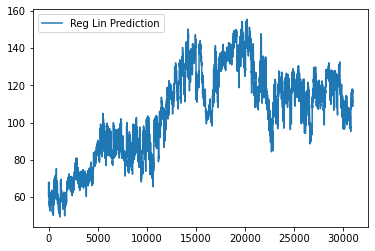

In [142]:
y_pred_lr.plot()

# Logistic Regression

In [143]:
from sklearn.linear_model import SGDRegressor,ARDRegression,HuberRegressor

In [144]:
model_HR = HuberRegressor()
model_HR .fit(x_train,y_train)

HuberRegressor()

In [145]:
y_pred_HR = model_HR .predict(x_test)
mse = mean_squared_error(y_test, y_pred_HR )
rmse = np.sqrt(mean_squared_error(y_test, y_pred_HR ))
mae = mean_absolute_error(y_test, y_pred_HR )
explained_var = explained_variance_score(y_test,  y_pred_HR )
r2_score_HR = r2_score(y_test,  y_pred_HR )
print('Huber Regressor')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score_HR }')

Huber Regressor
mse = 24300.09442141922
rmse = 155.88487553774812
mae = 140.00050494812066
explained_var = 0.12381376968933899
r2_score = -3.300028423208815


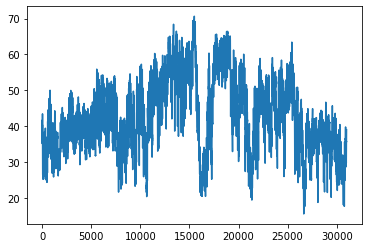

In [146]:
plt.plot(y_pred_HR)

# SGDRegressor

In [147]:
model_SGD_R = SGDRegressor()
model_SGD_R.fit(x_train,y_train)

SGDRegressor()

Stochasti Gradient Regressor
mse = 1.6281769529853243e+35
rmse = 4.0350674752540685e+17
mae = 3.952319344332326e+17
explained_var = -1.1695701493769531e+30
r2_score = -2.881144021267354e+31


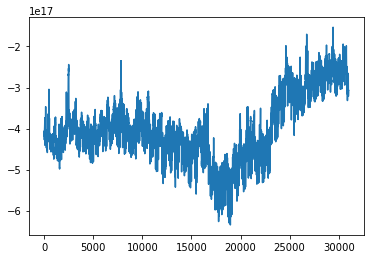

In [148]:
y_pred_SGD_R = model_SGD_R.predict(x_test)
mse = mean_squared_error(y_test, y_pred_SGD_R)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_SGD_R))
mae = mean_absolute_error(y_test, y_pred_SGD_R)
explained_var = explained_variance_score(y_test,  y_pred_SGD_R)
r2_score_SGD_R = r2_score(y_test,  y_pred_SGD_R)
print('Stochasti Gradient Regressor')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score_SGD_R}')
plt.plot(y_pred_SGD_R)

# ARDRegression

In [149]:
model_ARD = ARDRegression()
model_ARD.fit(x_train,y_train)

ARDRegression()

Bayesian Regressor ARD
mse = 13111.167237713205
rmse = 114.50400533480567
mae = 97.62179229533187
explained_var = 0.24113040384341544
r2_score = -1.3200894122418094


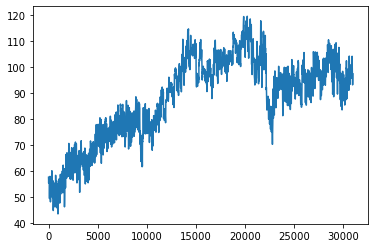

In [150]:
y_pred_ARD = model_ARD.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ARD)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ARD))
mae = mean_absolute_error(y_test, y_pred_ARD)
explained_var = explained_variance_score(y_test,  y_pred_ARD)
r2_score_ARD = r2_score(y_test,  y_pred_ARD)
print('Bayesian Regressor ARD')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score_ARD}')
plt.plot(y_pred_ARD)

In [151]:
from sklearn.linear_model import BayesianRidge

In [152]:
model_BAR = BayesianRidge()
model_BAR.fit(x_train,y_train)

BayesianRidge()

Bayesian regressor Ridge
mse = 9524.077976700288
rmse = 97.5913826969384
mae = 81.00722570560914
explained_var = 0.34638944886292966
r2_score = -0.6853352622601243


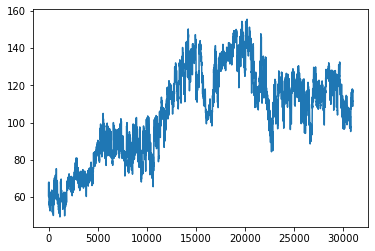

In [153]:
y_pred_BAR = model_BAR.predict(x_test)
mse = mean_squared_error(y_test, y_pred_BAR)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_BAR))
mae = mean_absolute_error(y_test, y_pred_BAR)
explained_var = explained_variance_score(y_test,  y_pred_BAR)
r2_score_BAR = r2_score(y_test,  y_pred_BAR)
print('Bayesian regressor Ridge')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score_BAR}')
plt.plot(y_pred_BAR)

# Arbre de décision

In [154]:
from sklearn.tree import DecisionTreeRegressor

In [155]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [156]:
y_pred_DTR = model_DTR.predict(x_test)
mse = mean_squared_error(y_test, y_pred_DTR)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_DTR))
mae = mean_absolute_error(y_test, y_pred_DTR)
explained_var = explained_variance_score(y_test, y_pred_DTR)
r2_score_DTR = r2_score(y_test, y_pred_DTR)
print('Arbre de decision')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score_DTR}')

Arbre de decision
mse = 19394.153157511733
rmse = 139.26289224883897
mae = 118.45425550106474
explained_var = -0.10444607508947135
r2_score = -2.431896534025683


In [157]:
len(y_pred_DTR)

30994

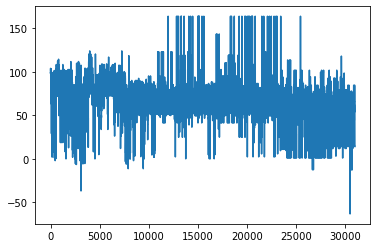

In [158]:
plt.plot(y_pred_DTR)

# Random Forest

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
model_RFR = RandomForestRegressor()
model_RFR.fit(x_train,y_train)

RandomForestRegressor()

In [161]:
y_pred_RFR = model_RFR.predict(x_test)
mse = mean_squared_error(y_test, y_pred_RFR)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_RFR))
mae = mean_absolute_error(y_test, y_pred_RFR)
explained_var = explained_variance_score(y_test, y_pred_RFR)
r2_score_RFR = r2_score(y_test, y_pred_RFR)
print('Random Forest')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score_RFR = {r2_score_RFR}')

Random Forest
mse = 19487.561032010708
rmse = 139.59785468269456
mae = 119.0321033288701
explained_var = -0.09002442927161769
r2_score_RFR = -2.4484255445032335


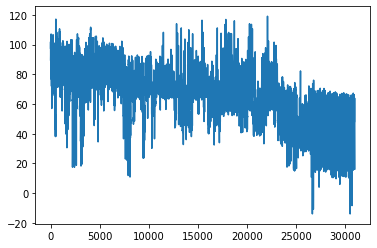

In [162]:
plt.plot(y_pred_RFR)

# XGBoost

In [163]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor

In [164]:
model_XGB = GradientBoostingRegressor()
model_XGB.fit(x_train,y_train)

GradientBoostingRegressor()

In [165]:

y_pred_XGB = model_XGB.predict(x_test)
mse = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_XGB))
mae = mean_absolute_error(y_test, y_pred_RFR)
explained_var = explained_variance_score(y_test, y_pred_XGB)
r2_score_XGB = r2_score(y_test, y_pred_XGB)
print('XGBoost')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score_RFR = {r2_score_XGB}')

XGBoost
mse = 17465.14144113739
rmse = 132.15574690923356
mae = 119.0321033288701
explained_var = 0.011306304710862136
r2_score_RFR = -2.090547851783483


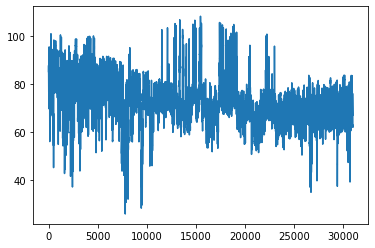

In [166]:
plt.plot(y_pred_XGB)

# ANN + Metha heuristique

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Bidirectional, Embedding,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [168]:
input_size = x_train.shape[1]
callback = EarlyStopping(monitor = "loss" , patience = 10)
model = Sequential()
model.add(Dense(input_size, activation = "relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = 'mae' )

In [169]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test),
          batch_size = 128, epochs = 700 , callbacks = [callback])

Epoch 1/700
969/969 [==============================] - 3s 2ms/step - loss: 72.1940 - val_loss: 148.2673
Epoch 2/700
969/969 [==============================] - 2s 2ms/step - loss: 16.9107 - val_loss: 149.5239
Epoch 3/700
969/969 [==============================] - 2s 2ms/step - loss: 16.2606 - val_loss: 148.2703
Epoch 4/700
969/969 [==============================] - 2s 2ms/step - loss: 15.7548 - val_loss: 148.4659
Epoch 5/700
969/969 [==============================] - 2s 2ms/step - loss: 15.3187 - val_loss: 150.3269
Epoch 6/700
969/969 [==============================] - 2s 2ms/step - loss: 14.9827 - val_loss: 150.1999
Epoch 7/700
969/969 [==============================] - 2s 2ms/step - loss: 14.7125 - val_loss: 151.1937
Epoch 8/700
969/969 [==============================] - 2s 2ms/step - loss: 14.3745 - val_loss: 151.4262
Epoch 9/700
969/969 [==============================] - 2s 2ms/step - loss: 14.1916 - val_loss: 153.3699
Epoch 10/700
969/969 [==============================] - 2s 2ms/s

In [170]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 flatten (Flatten)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               2560      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2

Text(0.5, 1.0, 'Training and Validation Loss')

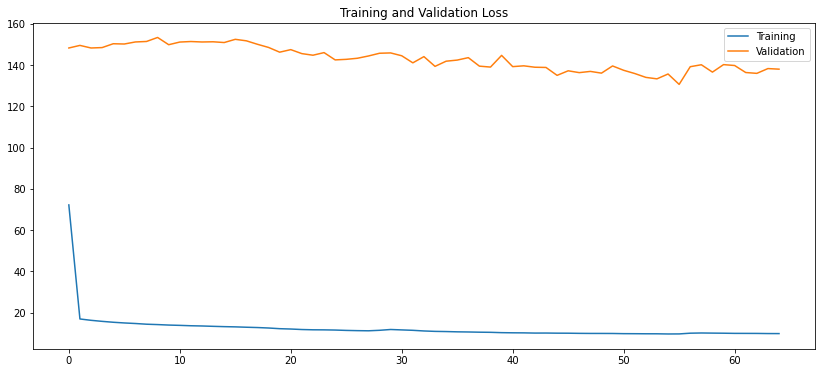

In [171]:
plt.figure(figsize= (14,6))
plt.plot(model.history.history['loss'], label='Training')
plt.plot(model.history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')


In [172]:
y_pred_ANNN = model.predict(x_test)

In [173]:
mse = mean_squared_error(y_test, y_pred_ANNN)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ANNN))
mae = mean_absolute_error(y_test, y_pred_ANNN)
explained_var = explained_variance_score(y_test, y_pred_ANNN)
r2_score_ANN = r2_score(y_test, y_pred_ANNN)
print('ANN')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score_ANN = {r2_score_ANN}')

ANN
mse = 24070.937955137317
rmse = 155.14811618301175
mae = 138.00504954264045
explained_var = 0.049055979124604354
r2_score_ANN = -3.2594779915402983


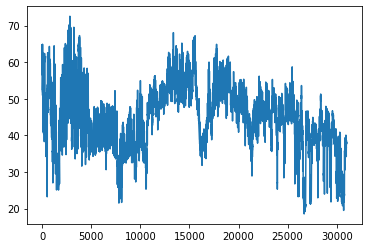

In [174]:
plt.plot(y_pred_ANNN)

# Back Propagation NN

# Deep learning

# RNN

In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [164]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True,input_shape =(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 32, return_sequences = True))
#regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 16))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [165]:
callback = EarlyStopping(monitor = "loss" , patience = 10)

In [166]:
regressor.fit(x_train, y_train, epochs = 50, batch_size = 256,validation_data = (x_test, y_test) ,callbacks = [callback])

Epoch 1/50
485/485 [==============================] - 28s 50ms/step - loss: 406.1224 - val_loss: 24515.5684
Epoch 2/50
485/485 [==============================] - 24s 49ms/step - loss: 395.7829 - val_loss: 24911.6191
Epoch 3/50
485/485 [==============================] - 24s 50ms/step - loss: 385.9220 - val_loss: 23067.1172
Epoch 4/50
485/485 [==============================] - 24s 50ms/step - loss: 377.2653 - val_loss: 23987.7070
Epoch 5/50
485/485 [==============================] - 25s 51ms/step - loss: 370.7587 - val_loss: 23249.4922
Epoch 6/50
485/485 [==============================] - 25s 51ms/step - loss: 363.4355 - val_loss: 24142.0781
Epoch 7/50
485/485 [==============================] - 25s 52ms/step - loss: 355.3975 - val_loss: 24107.2090
Epoch 8/50
485/485 [==============================] - 26s 53ms/step - loss: 348.7207 - val_loss: 26193.6973
Epoch 9/50
485/485 [==============================] - 25s 51ms/step - loss: 346.1802 - val_loss: 23986.1406
Epoch 10/50
485/485 [=======

In [167]:
y_pred_RNN = regressor.predict(x_test)

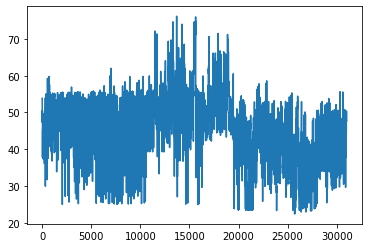

In [168]:
plt.plot(y_pred_RNN)

In [169]:
mse = mean_squared_error(y_test, y_pred_RNN)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_RNN))
mae = mean_absolute_error(y_test, y_pred_RNN)
explained_var = explained_variance_score(y_test, y_pred_RNN)
r2_score_RNN = r2_score(y_test, y_pred_RNN)
print('RNN')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\n r2_score_RNN = {r2_score_RNN}')

RNN
mse = 23830.44905447115
rmse = 154.3711406140123
mae = 136.91996986805657
explained_var = 0.026200289879349414
 r2_score_RNN = -3.2169222265133426


In [170]:
predicted_stock_price = regressor.predict(X)

In [171]:
len(predicted_stock_price),len(Y)

(154967, 154967)

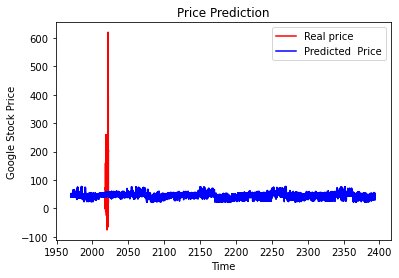

In [172]:
plt.plot(Y, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# SVR

In [173]:
from sklearn.svm import LinearSVR,SVR

In [ ]:
model_LSVR = LinearSVR()
model_LSVR.fit(x_train,y_train)

In [ ]:


y_pred_LSVR = model_LSVR.predict(x_test)
mse = mean_squared_error(y_test, y_pred_LSVR)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_LSVR))
mae = mean_absolute_error(y_test, y_pred_LSVR)
explained_var = explained_variance_score(y_test, y_pred_LSVR)
r2_score_LSVR = r2_score(y_test, y_pred_LSVR)
print('LSVR')
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score_RFR = {r2_score_LSVR}')

# BPP

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [ ]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [ ]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [ ]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [ ]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [ ]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [ ]:

def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return y_pred

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [ ]:
neural_network(X, y, n1=32)

# Données 2030

In [175]:
## Données des prix du carbone
Data_Carbon_Price_2030 = pd.read_excel("Price History_20220704_1155_By_Day 2030.xlsx", sheet_name= "Sheet 1")

## Data Mix energie RTE
Data_Mix_Energy_2030 = pd.read_excel("RTE_Energie_Mix 2030.xlsx")

## Données des consommations électriques
Data_Conso_Electric_2030 = pd.read_excel("RTE conso elec  2030.xlsx")


In [176]:
## Données de la météo
##Data_Meteo = pd.read_excel("Données météo.xlsx")

Data_Meteo_2030 = pd.read_excel("data_météo 2030.xlsx")


In [177]:
Data_Carbon_Price_2030

,Exchange Date,Date Hour,Hour,Close,Net,%Chg,Open,Low,High,Volume,OI,Unnamed: 11,Annee,Unnamed: 13,Unnamed: 14
0,2021-01-04,2021-01-04 01:00:00,01:00:00,33.560000,0.99,0.030396,33.75,33.75,33.75,2.0,11114.0,NaN,2021,1,1.256696
1,2021-01-05,2021-01-05 02:00:00,02:00:00,32.840000,-0.72,-0.021454,NaN,NaN,NaN,NaN,11114.0,0.627678,2021,1,1.256696
2,2021-01-06,2021-01-06 01:00:00,01:00:00,33.510000,0.67,0.020402,33.48,32.95,33.48,1256.0,10859.0,0.614212,2021,1,1.256696
3,2021-01-07,2021-01-07 02:00:00,02:00:00,34.640000,1.13,0.033721,33.87,33.87,34.29,143.0,10998.0,0.626743,2021,1,1.256696
4,2021-01-08,2021-01-08 01:00:00,01:00:00,34.800000,0.16,0.004619,35.00,34.24,35.00,20.0,10988.0,0.647877,2021,1,1.256696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,2030-12-27,2030-12-27 01:00:00,01:00:00,210.638286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2030,8,2.495714
3488,2030-12-28,2030-12-28 01:00:00,01:00:00,209.240686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2030,8,2.495714
3489,2030-12-29,2030-12-29 02:00:00,02:00:00,208.666671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2030,8,2.495714
3490,2030-12-30,2030-12-30 01:00:00,01:00:00,208.791457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2030,8,2.495714


# Process

In [178]:
Data_Meteo_2030["t celsius"] = Data_Meteo_2030["t"]-273.15

In [179]:
Data_Mix_Energy_2030['Mois Hours'] = pd.to_datetime(Data_Mix_Energy_2030['Mois Hours'])

In [180]:
Data_Carbon_Price_2030.rename(columns = {'Close':'Carbon Price'}, inplace = True)

# Selection colonnes

In [181]:
colonnes_meteo = ['Date Hour','dd',"t celsius",'ff','n']


In [182]:
Data_Meteo_2030 = Data_Meteo_2030[colonnes_meteo]

In [183]:
colonnes_Mix = ["Mois Hours",'Production totale','Production nucléaire','Production hydraulique', 
                'Production éolien', 'Production solaire','Production bioénergies', 'Consommation totale']

In [184]:
Data_Mix_Energy_2030= Data_Mix_Energy_2030[colonnes_Mix]

In [185]:
colonne_conso_elec = ['Date Heures','Months','Minutes','Consommation','Nucléaire', 'Eolien', 
                      'Solaire', 'Hydraulique','Bioénergies','Gaz']

In [186]:
Data_Conso_Electric_2030  = Data_Conso_Electric_2030[colonne_conso_elec]

In [187]:
Data_Carbon_Price_2030['date'] = Data_Carbon_Price_2030['Exchange Date']

# Merge

In [188]:
df_test = Data_Conso_Electric_2030.merge(right =  Data_Meteo_2030 , how='left',left_on= "Date Heures", right_on= 'Date Hour')
df_test = df_test.merge(right = Data_EPEX , how='left',left_on= "Date Heures", right_on= 'Date Hours')
df_test = df_test.merge(right = Data_Carbon_Price_2030 , how='left',left_on= "Date Heures", right_on= 'Date  Hour')
df_test = df_test.merge(right = Data_Mix_Energy_2030 , how='left',left_on= "Date Heures", right_on= 'Mois Hours')

In [189]:
df_test

,Date Heures,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,...,Unnamed: 14,date,Mois Hours,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale
0,2021-01-01 00:00:00,1,0,67010.0,50599.0,935.0,1.0,7457.0,1112.0,5553.0,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 00:15:00,1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-01 00:30:00,1,30,67071.0,50535.0,1620.0,0.0,7327.0,1148.0,5637.0,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01 00:45:00,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01 01:00:00,1,60,65052.0,50467.0,1615.0,0.0,6222.0,1147.0,4515.0,...,NaN,NaT,2021-01-01 01:00:00,55421.0,37176.0,7320.0,3944.0,434.0,839.0,52983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355234,2031-02-19 21:15:00,2,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355235,2031-02-19 21:30:00,2,1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355236,2031-02-19 21:45:00,2,1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355237,2031-02-19 22:00:00,2,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
date = df_test[['Date Heures']]

In [191]:
date

,Date Heures
0,2021-01-01 00:00:00
1,2021-01-01 00:15:00
2,2021-01-01 00:30:00
3,2021-01-01 00:45:00
4,2021-01-01 01:00:00
...,...
355234,2031-02-19 21:15:00
355235,2031-02-19 21:30:00
355236,2031-02-19 21:45:00
355237,2031-02-19 22:00:00


In [192]:
df_test.columns

Index(['Date Heures', 'Months', 'Minutes', 'Consommation', 'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Gaz', 'Date Hour',
       'dd', 't celsius', 'ff', 'n', 'Date Hours', 'Date', 'Hours',
       'Electricity Price', 'Exchange Date', 'Date  Hour', 'Hour',
       'Carbon Price', 'Net', '%Chg', 'Open', 'Low', 'High', 'Volume', 'OI',
       'Unnamed: 11', 'Annee', 'Unnamed: 13', 'Unnamed: 14', 'date',
       'Mois Hours', 'Production totale', 'Production nucléaire',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies', 'Consommation totale'],
      dtype='object')

In [193]:
df_test

,Date Heures,Months,Minutes,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,...,Unnamed: 14,date,Mois Hours,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale
0,2021-01-01 00:00:00,1,0,67010.0,50599.0,935.0,1.0,7457.0,1112.0,5553.0,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 00:15:00,1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-01 00:30:00,1,30,67071.0,50535.0,1620.0,0.0,7327.0,1148.0,5637.0,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01 00:45:00,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01 01:00:00,1,60,65052.0,50467.0,1615.0,0.0,6222.0,1147.0,4515.0,...,NaN,NaT,2021-01-01 01:00:00,55421.0,37176.0,7320.0,3944.0,434.0,839.0,52983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355234,2031-02-19 21:15:00,2,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355235,2031-02-19 21:30:00,2,1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355236,2031-02-19 21:45:00,2,1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355237,2031-02-19 22:00:00,2,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df_test = df_test.set_index('Date Heures')

In [195]:
colonne_finale = [ 'Months', 'Minutes', 'Consommation', 'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Gaz',
       'dd', "t celsius", 'ff', 'n',
       'Carbon Price', 'Production totale',
       'Production nucléaire', 'Production hydraulique', 'Production éolien',
       'Production solaire', 'Production bioénergies']

In [196]:
df_test_2 = df_test[colonne]

In [197]:
df_test_2 = df_test_2.set_index('Date Heures')

KeyError: "None of ['Date Heures'] are in the columns"

In [201]:
df_test_2.columns

Index(['Months', 'Minutes', 't celsius', 'Carbon Price', 'ff', 'n',
       'Consommation', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique',
       'Bioénergies', 'Gaz', 'Production totale', 'Production nucléaire',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies'],
      dtype='object')

In [202]:
df_test_2 .head(2)

,Months,Minutes,t celsius,Carbon Price,ff,n,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies
Date Heures,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,0,-0.4,NaN,1.8,10.0,67010.0,50599.0,935.0,1.0,7457.0,1112.0,5553.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:15:00,1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df_test_2)/

In [203]:
(df_test_2.isna().sum()/len(df_test_2))*100

Months                     0.000000
Minutes                    0.000000
t celsius                 92.098559
Carbon Price              99.016437
ff                        91.665893
n                         91.730919
Consommation              51.554869
Nucléaire                 54.425049
Eolien                    51.597375
Solaire                   63.764958
Hydraulique               51.597375
Bioénergies               51.597375
Gaz                       51.597375
Production totale         99.966501
Production nucléaire      99.966501
Production hydraulique    99.966501
Production éolien         99.966501
Production solaire        99.993244
Production bioénergies    99.993244
dtype: float64

# Gestion Valeur manquantes

In [204]:
df_test_2 [c_Mix] = df_test_2 [c_Mix].fillna(method = "ffill")
df_test_2 [c_Mix] = df_test_2 [c_Mix].fillna(method = "bfill")

In [205]:
df_test_2 [[ "t celsius", 'ff', 'n']] = df_test_2 [[ "t celsius", 'ff', 'n']].interpolate(method = "time")

In [206]:
df_test_2[['Consommation','Nucléaire', 'Eolien','Solaire', 'Hydraulique','Bioénergies','Gaz']] = df_test_2[['Consommation','Nucléaire', 'Eolien','Solaire', 'Hydraulique','Bioénergies','Gaz']].interpolate(method = "time")

In [207]:
df_test_2[["Carbon Price"]] = df_test_2[["Carbon Price"]].interpolate(method = "time")
df_test_2[["Carbon Price"]] = df_test_2[["Carbon Price"]].fillna(method = "ffill")
df_test_2[["Carbon Price"]] = df_test_2[["Carbon Price"]].fillna(method = "bfill")

In [208]:
df_test_2.isna().sum()

Months                    0
Minutes                   0
t celsius                 0
Carbon Price              0
ff                        0
n                         0
Consommation              0
Nucléaire                 0
Eolien                    0
Solaire                   0
Hydraulique               0
Bioénergies               0
Gaz                       0
Production totale         0
Production nucléaire      0
Production hydraulique    0
Production éolien         0
Production solaire        0
Production bioénergies    0
dtype: int64

In [209]:
df_test_2

,Months,Minutes,t celsius,Carbon Price,ff,n,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Gaz,Production totale,Production nucléaire,Production hydraulique,Production éolien,Production solaire,Production bioénergies
Date Heures,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,0,-0.400000,32.840000,1.800000,10.00,67010.00,50599.0,935.00,1.00,7457.00,1112.0,5553.0,55421.000000,37176.0,7320.000000,3944.00,434.00,839.0
2021-01-01 00:15:00,1,15,-0.525000,32.840000,1.791667,11.25,67040.50,50567.0,1277.50,0.50,7392.00,1130.0,5595.0,55421.000000,37176.0,7320.000000,3944.00,434.00,839.0
2021-01-01 00:30:00,1,30,-0.650000,32.840000,1.783333,12.50,67071.00,50535.0,1620.00,0.00,7327.00,1148.0,5637.0,55421.000000,37176.0,7320.000000,3944.00,434.00,839.0
2021-01-01 00:45:00,1,45,-0.775000,32.840000,1.775000,13.75,66061.50,50501.0,1617.50,0.00,6774.50,1147.5,5076.0,55421.000000,37176.0,7320.000000,3944.00,434.00,839.0
2021-01-01 01:00:00,1,60,-0.900000,32.840000,1.766667,15.00,65052.00,50467.0,1615.00,0.00,6222.00,1147.0,4515.0,55421.000000,37176.0,7320.000000,3944.00,434.00,839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031-02-19 21:15:00,2,1275,13.264286,213.932629,8.107500,90.00,80506.08,41775.0,17152.32,23.04,38054.88,5421.6,2931.0,44430.352607,31281.1,5902.160958,8339.91,3270.25,1699.5
2031-02-19 21:30:00,2,1290,13.264286,213.932629,8.107500,90.00,80506.08,41775.0,17152.32,23.04,38054.88,5421.6,2931.0,44430.352607,31281.1,5902.160958,8339.91,3270.25,1699.5
2031-02-19 21:45:00,2,1305,13.264286,213.932629,8.107500,90.00,80506.08,41775.0,17152.32,23.04,38054.88,5421.6,2931.0,44430.352607,31281.1,5902.160958,8339.91,3270.25,1699.5


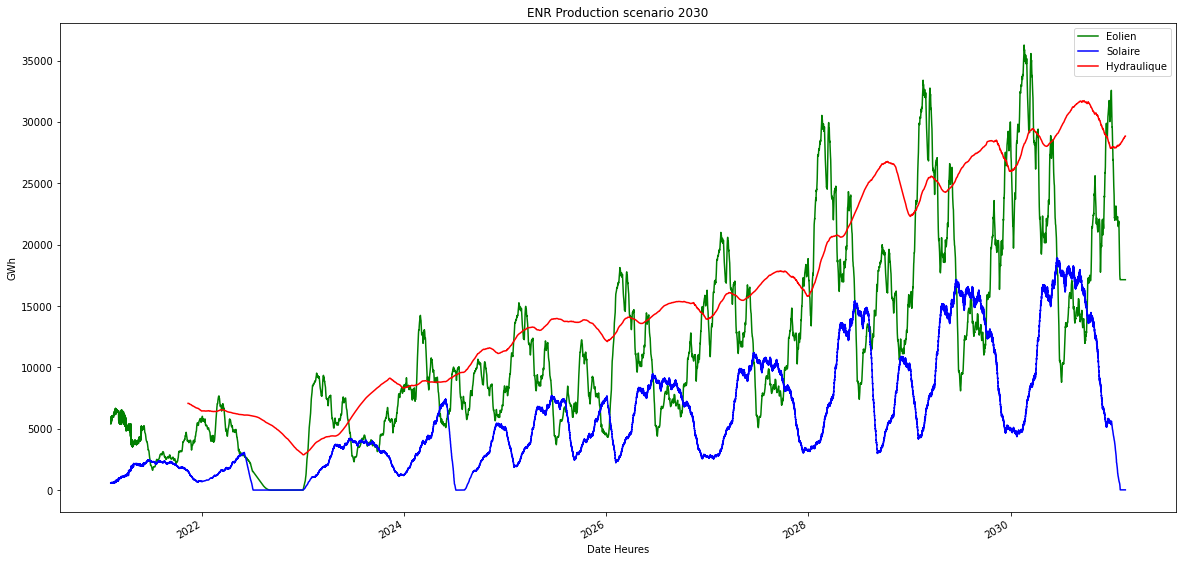

In [210]:
plt.legend("Carbon Price")
plt.title("ENR Production scenario 2030")
plt.ylabel("GWh")
df_test_2["Eolien"].rolling(3000).mean().plot(figsize = (20,10),color = 'green')
df_test_2["Solaire"].rolling(3000).mean().plot(figsize = (20,10),color = 'blue')
df_test_2["Hydraulique"].rolling(30000).mean().plot(figsize = (20,10),color = 'red')
plt.legend()

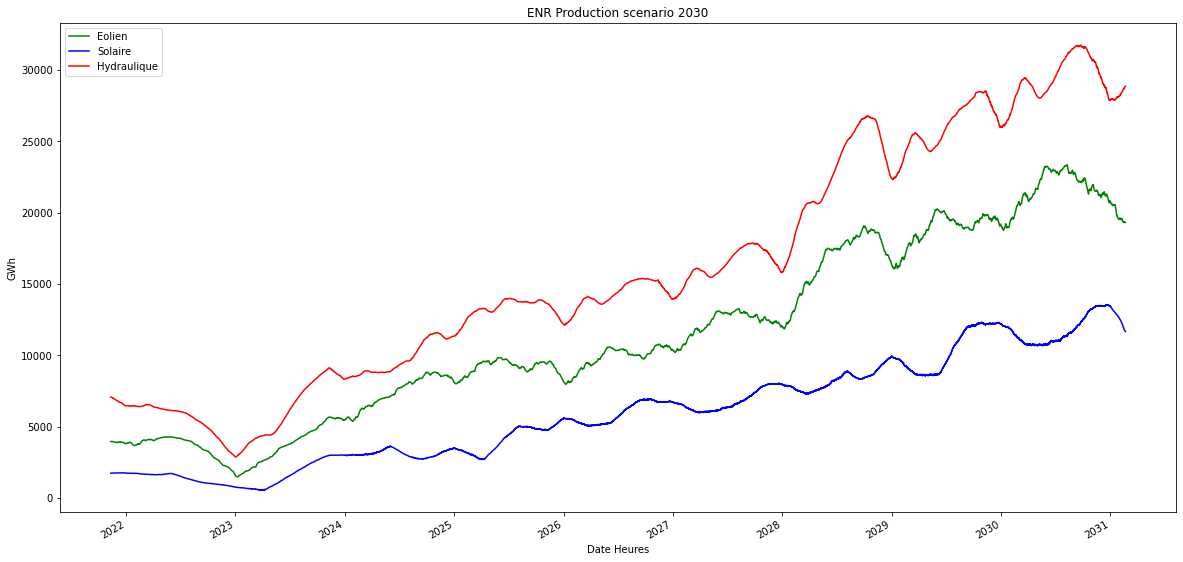

In [211]:
plt.legend("Carbon Price")
plt.title("ENR Production scenario 2030")
plt.ylabel("GWh")
df_test_2["Eolien"].rolling(30000).mean().plot(figsize = (20,10),color = 'green')
df_test_2["Solaire"].rolling(30000).mean().plot(figsize = (20,10),color = 'blue')
df_test_2["Hydraulique"].rolling(30000).mean().plot(figsize = (20,10),color = 'red')
plt.legend()

<AxesSubplot:title={'center':'Température scenario 2030 2°C'}, xlabel='Date Heures', ylabel='°C'>

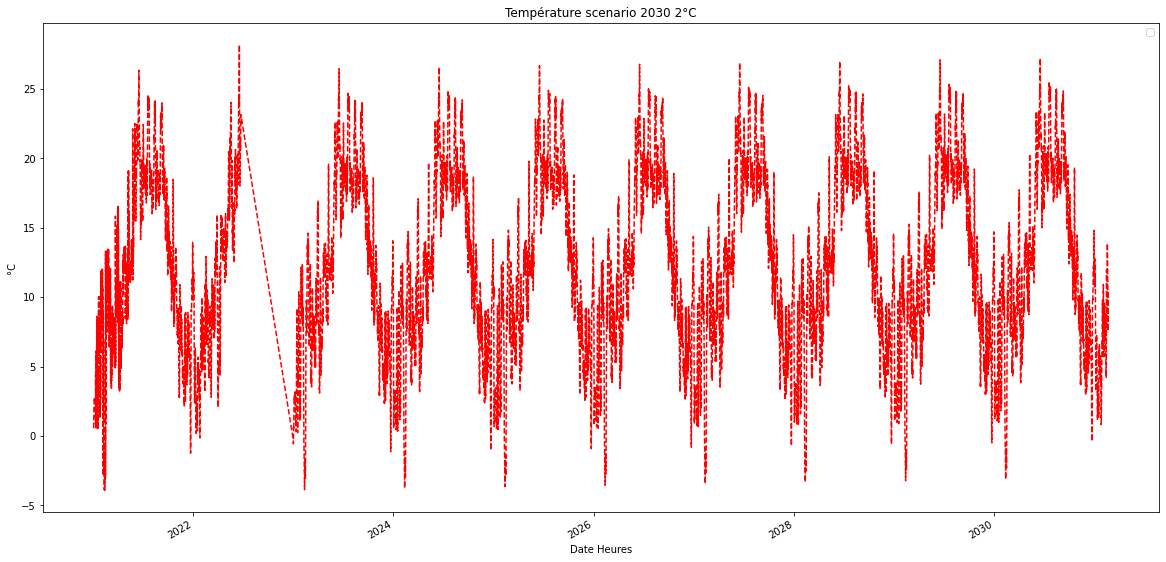

In [212]:
plt.legend("Carbon Price")
plt.title("Température scenario 2030 2°C")
plt.ylabel("°C")
df_test_2["t celsius"].rolling(100).mean().plot(figsize = (20,10),color = 'red',linestyle='dashed')

<AxesSubplot:title={'center':'Température scenario 2030 2°C'}, xlabel='Date Heures', ylabel='°C'>

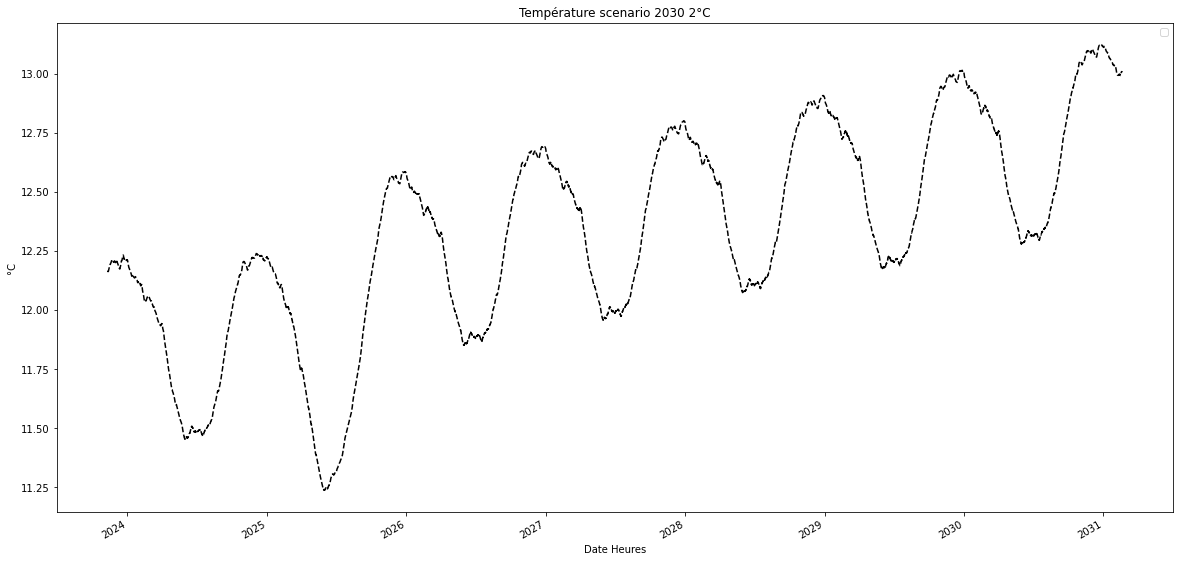

In [213]:
plt.legend("Carbon Price")
plt.title("Température scenario 2030 2°C")
plt.ylabel("°C")
df_test_2["t celsius"].rolling(100000).mean().plot(figsize = (20,10),color = 'black',linestyle='dashed')

<AxesSubplot:title={'center':'Wind Velocity'}, xlabel='Date Heures', ylabel='m/s'>

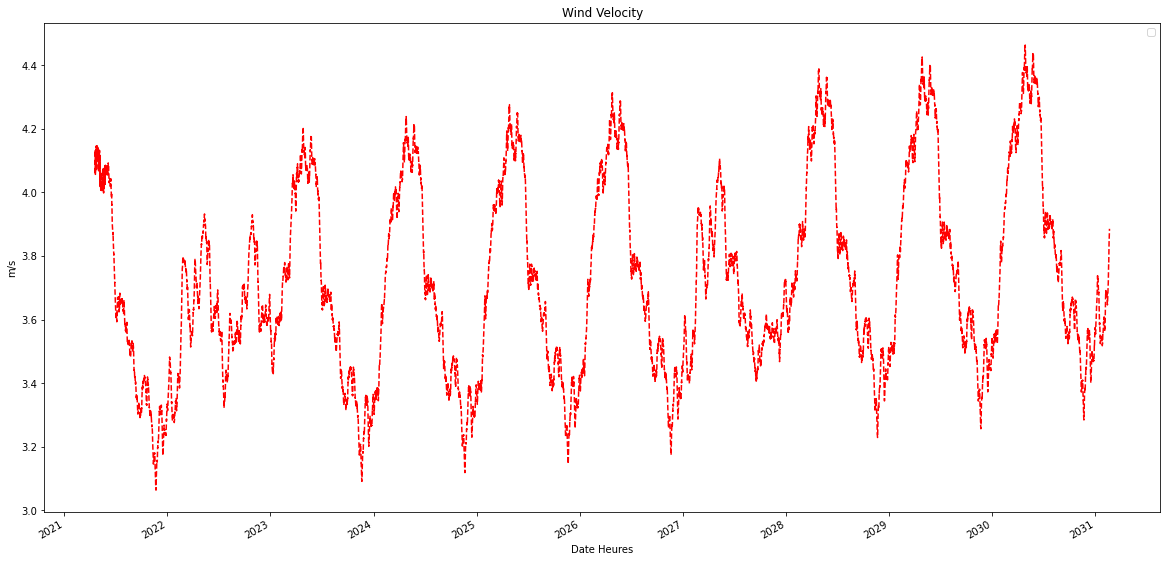

In [214]:
plt.legend("Carbon Price")
plt.title("Wind Velocity")
plt.ylabel("m/s")
df_test_2["ff"].rolling(10000).mean().plot(figsize = (20,10),color = 'r',linestyle='dashed')

<AxesSubplot:title={'center':'Wind Velocity'}, xlabel='Date Heures', ylabel='m/s'>

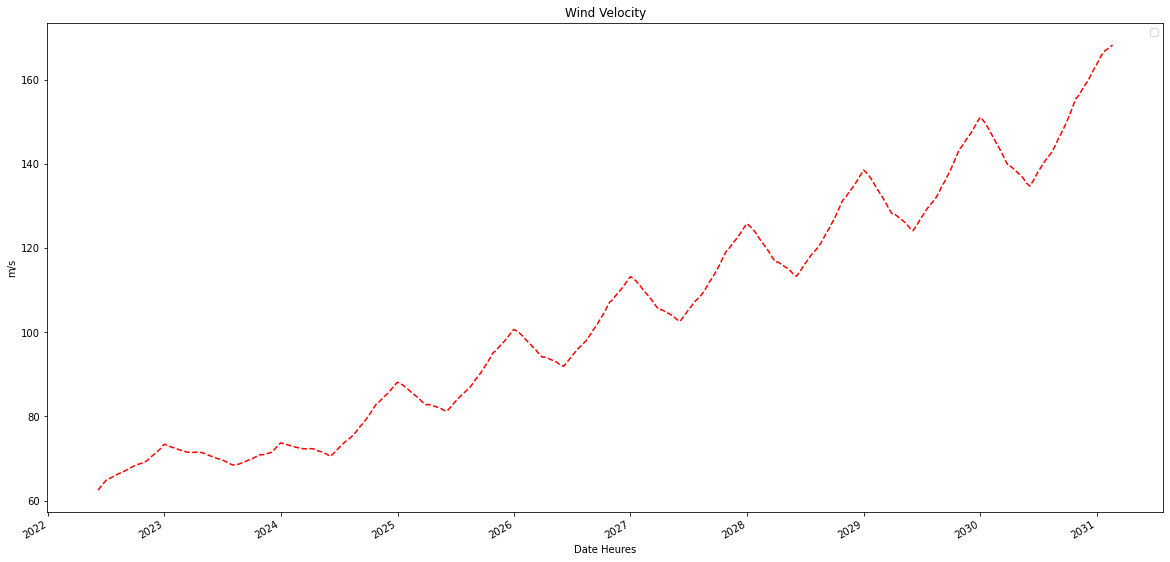

In [215]:
plt.legend("Carbon Price")
plt.title("Wind Velocity")
plt.ylabel("m/s")
df_test_2["Carbon Price"].rolling(50000).mean().plot(figsize = (20,10),color = 'r',linestyle='dashed')

<AxesSubplot:title={'center':'Eolien Production scenario 2030'}, xlabel='Date Heures', ylabel='GWh'>

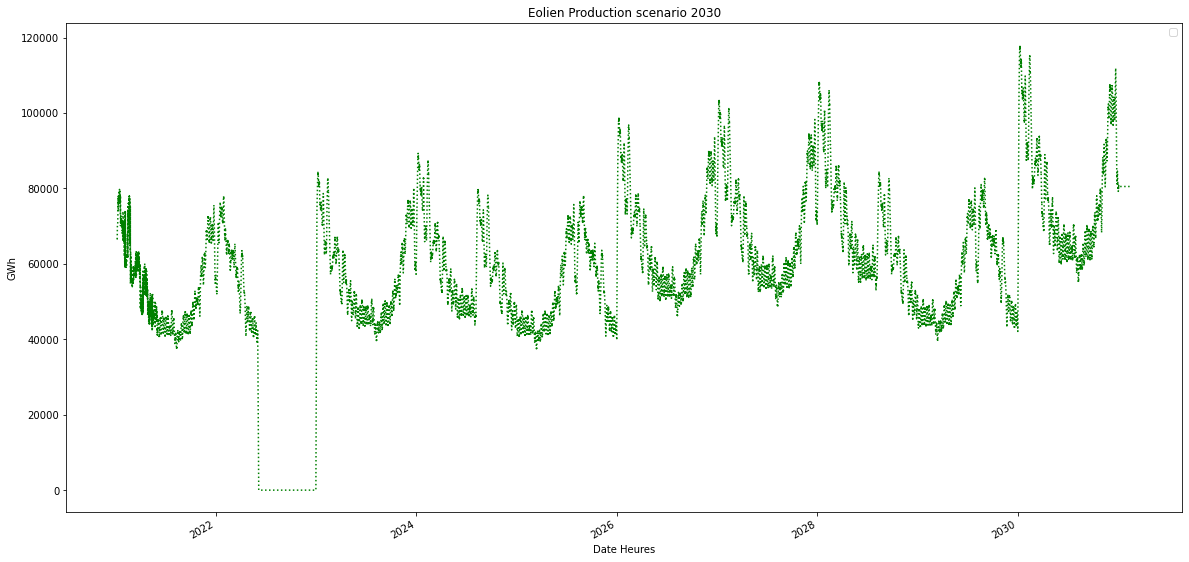

In [227]:
plt.legend("Carbon Price")
plt.title("Eolien Production scenario 2030")
plt.ylabel("GWh")
df_test_2["Consommation"].rolling(300).mean().plot(figsize = (20,10),color = 'green',linestyle='dotted')

<AxesSubplot:title={'center':'Eolien Production scenario 2030'}, xlabel='Date Heures', ylabel='GWh'>

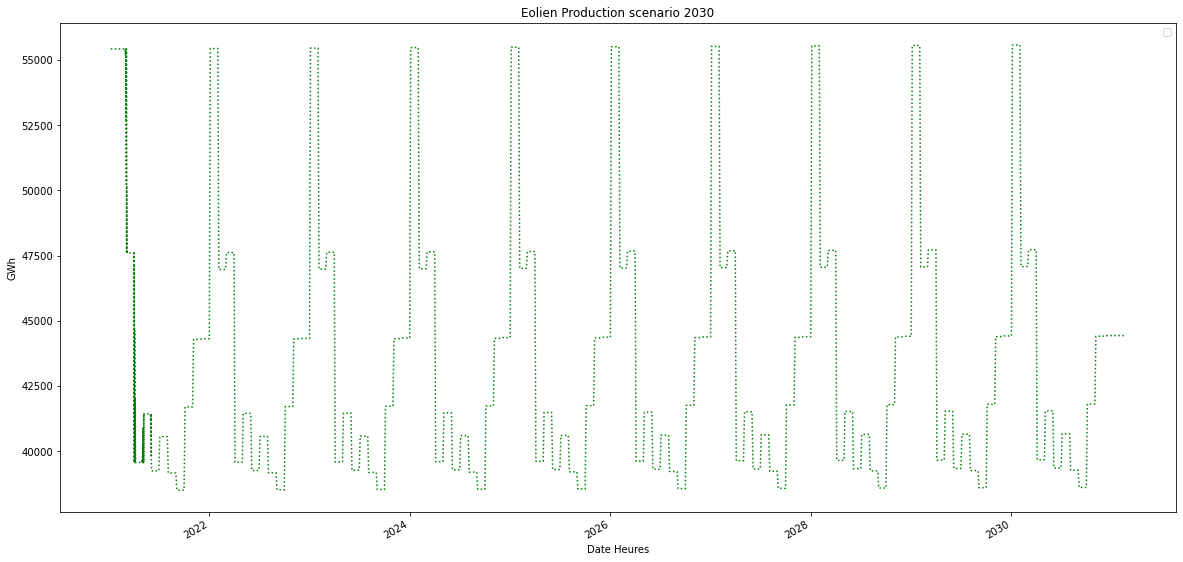

In [217]:
plt.legend("Carbon Price")
plt.title("Eolien Production scenario 2030")
plt.ylabel("GWh")
df_test_2['Production totale'].rolling(300).mean().plot(figsize = (20,10),color = 'green',linestyle='dotted')

In [218]:
df_test_2.columns

Index(['Months', 'Minutes', 't celsius', 'Carbon Price', 'ff', 'n',
       'Consommation', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique',
       'Bioénergies', 'Gaz', 'Production totale', 'Production nucléaire',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies'],
      dtype='object')

# Prediction

In [219]:
df_test_2.columns

Index(['Months', 'Minutes', 't celsius', 'Carbon Price', 'ff', 'n',
       'Consommation', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique',
       'Bioénergies', 'Gaz', 'Production totale', 'Production nucléaire',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies'],
      dtype='object')

In [211]:
df_test_2 = df_test_2[colonne]

In [212]:
df_test_2.isna().sum()

Months                    0
Minutes                   0
t celsius                 0
Carbon Price              0
ff                        0
n                         0
Consommation              0
Nucléaire                 0
Eolien                    0
Solaire                   0
Hydraulique               0
Bioénergies               0
Gaz                       0
Production totale         0
Production nucléaire      0
Production hydraulique    0
Production éolien         0
Production solaire        0
Production bioénergies    0
dtype: int64

# Lineare regression

In [340]:
LR_Prediction = model_LR.predict(df_test_2)
LR_Prediction = pd.DataFrame(LR_Prediction)
df = pd.merge(date, LR_Prediction, left_index=True, right_index=True)
df =df.rename(columns = {0  : "LR_Prediction" })

In [343]:
df

,Date Heures,LR_Prediction
0,2021-01-01 00:00:00,56.742450
1,2021-01-01 00:15:00,56.423186
2,2021-01-01 00:30:00,56.103921
3,2021-01-01 00:45:00,54.263623
4,2021-01-01 01:00:00,52.423324
...,...,...
355234,2031-02-19 21:15:00,177.592090
355235,2031-02-19 21:30:00,177.585287
355236,2031-02-19 21:45:00,177.578485
355237,2031-02-19 22:00:00,177.571683


In [370]:
df2 = df[df["LR_Prediction"][:]>0]

In [351]:
date_periode = "2022-02-18 23:45:00"

In [373]:
df2 = df[df["LR_Prediction"][:]>0]

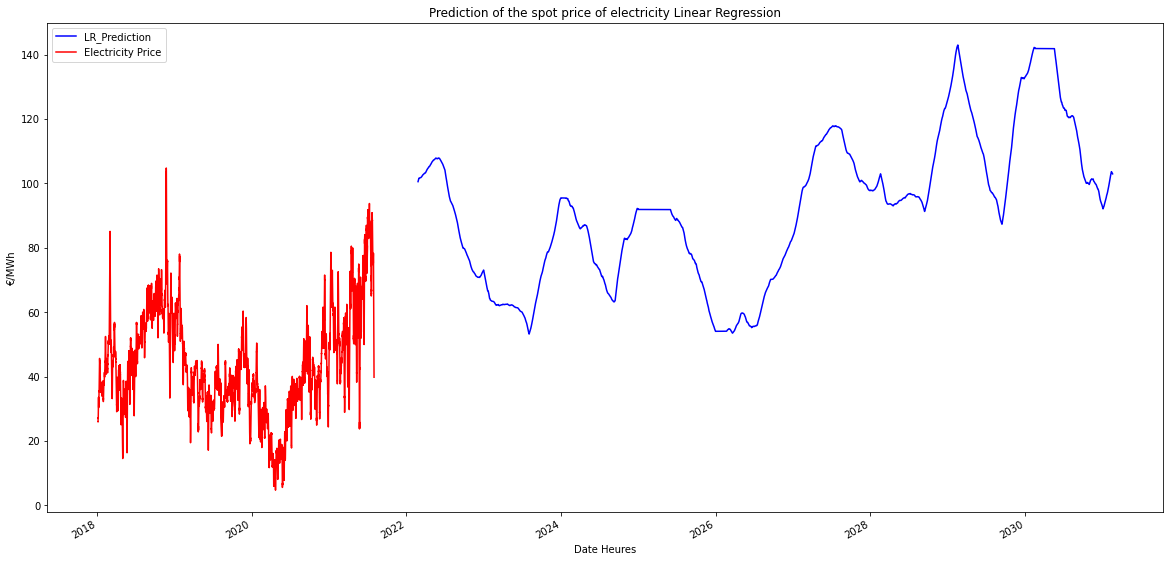

In [375]:
df2["LR_Prediction"][date_fin:].rolling(300).mean(.plot(figsize = (20,10),color = "blue")
Data_Merge_P1['Electricity Price'][:date_fin].rolling(300).mean().plot(color = "red")
plt.title("Prediction of the spot price of electricity Linear Regression")
plt.ylabel("€/MWh")
plt.legend()

In [ ]:
df2 = df[df["LR_Prediction"][:]>0]

In [ ]:
plt.plot(df["Date Heures"],df["LR_Prediction"])

In [ ]:
df[["LR_Prediction"]].plot(figsize = (20,10))

# Decision TRee

In [377]:
df = df.reset_index()

In [378]:
DT_Prediction = model_DTR.predict(df_test_2)
DT_Prediction = pd.DataFrame(DT_Prediction)

In [379]:
df = pd.merge(df, DT_Prediction, left_index=True, right_index=True)

In [380]:
df = df.rename(columns = {0  : "Decision Prediction" })

<AxesSubplot:>

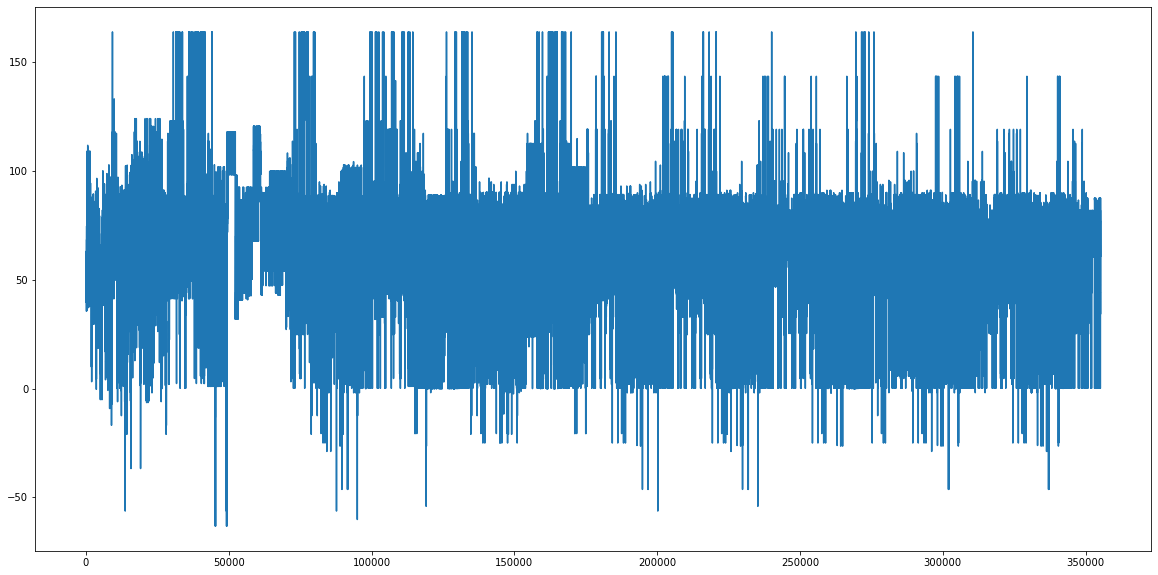

In [381]:
df["Decision Prediction"].plot(figsize = (20,10))

In [442]:
df3 = df[df["Decision Prediction"]>0]

<AxesSubplot:xlabel='Date Heures'>

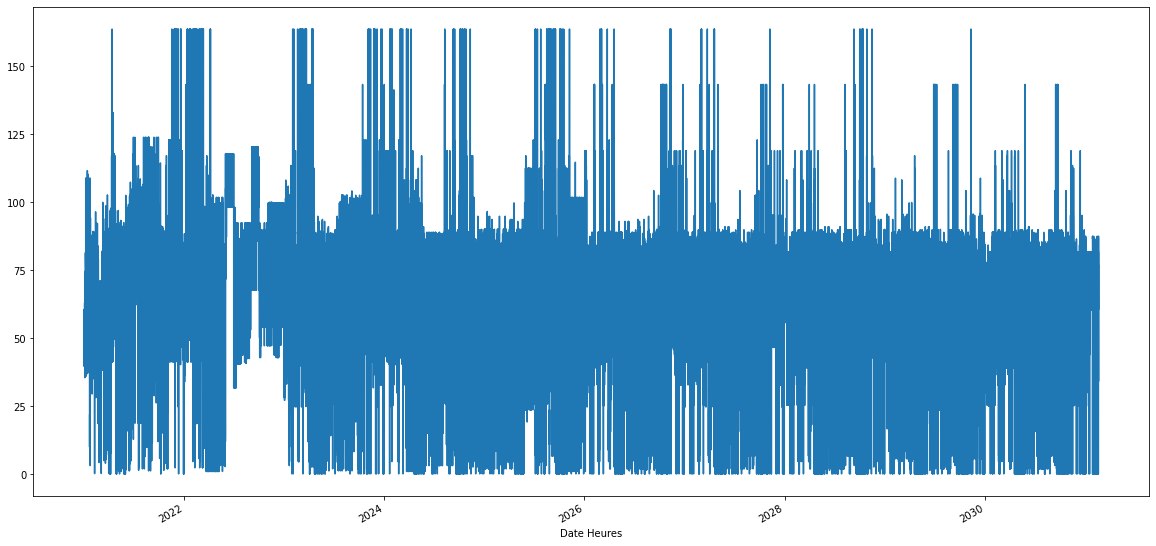

In [446]:
df3["Decision Prediction"] .plot(figsize = (20,10))

# XGBoost

In [229]:
XGB_Prediction = model_XGB.predict(df_test_2)
XGB_Prediction = pd.DataFrame(XGB_Prediction)
df = pd.merge(date, XGB_Prediction, left_index=True, right_index=True)
df =df.rename(columns = {0  : "XGB_Prediction" })

In [230]:
df = df.set_index("Date Heures")

Text(0, 0.5, '€/MWh')

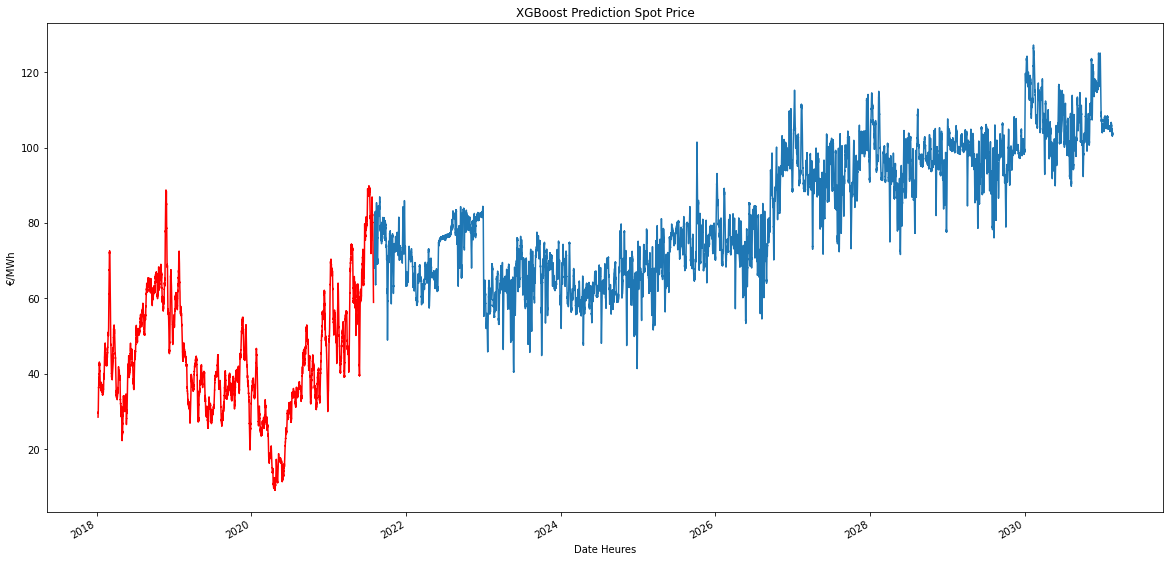

In [301]:
df["XGB_Prediction"][date_fin:].rolling(300).mean().plot(figsize = (20,10))
Data_Merge_P1['Electricity Price'][:date_fin].rolling(600).mean().plot(color = "red")
plt.title("XGBoost Prediction Spot Price")
plt.ylabel("€/MWh")

In [300]:
df["XGB_Prediction"] 

Date Heures
2021-01-01 00:00:00    59.407707
2021-01-01 00:15:00    60.304221
2021-01-01 00:30:00    61.487202
2021-01-01 00:45:00    61.314727
2021-01-01 01:00:00    59.881956
                         ...    
2031-02-19 21:15:00    97.038958
2031-02-19 21:30:00    96.256610
2031-02-19 21:45:00    95.946582
2031-02-19 22:00:00    94.468132
2031-02-19 22:15:00    94.468132
Name: XGB_Prediction, Length: 355239, dtype: float64

In [324]:
df = df.reset_index()

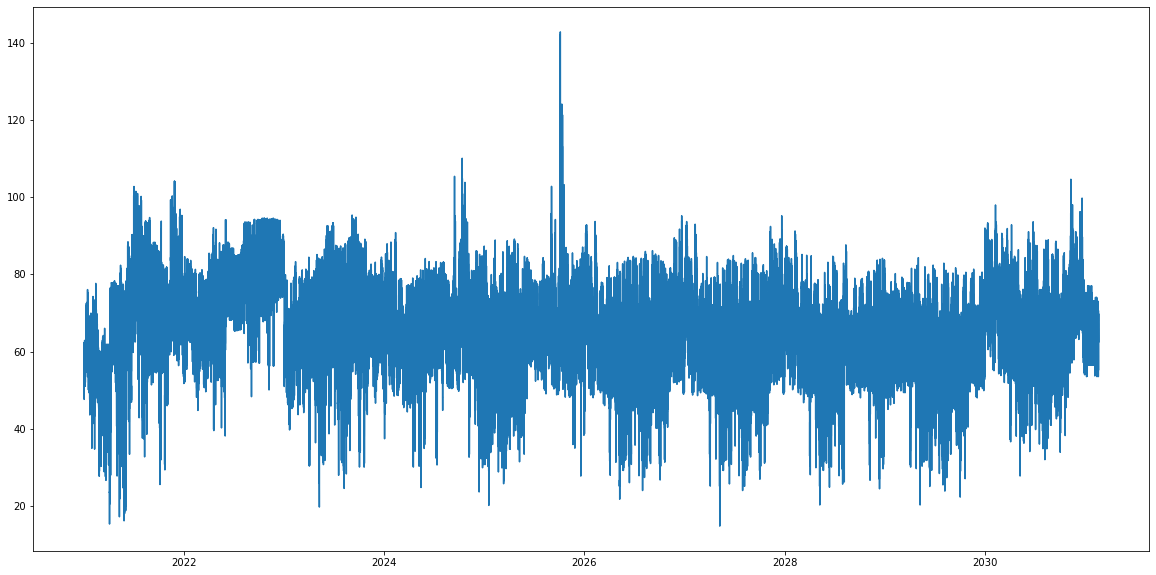

In [318]:
plt.figure(figsize = (20,10))
plt.plot(df["Date Heures"],df["XGB_Prediction"])


In [376]:
df

,LR_Prediction
Date Heures,
2021-01-01 00:00:00,56.742450
2021-01-01 00:15:00,56.423186
2021-01-01 00:30:00,56.103921
2021-01-01 00:45:00,54.263623
2021-01-01 01:00:00,52.423324
...,...
2031-02-19 21:15:00,-437.810754
2031-02-19 21:30:00,-438.027720
2031-02-19 21:45:00,-438.786426


# Random Forest

In [238]:
RF_Prediction =  model_RFR.predict(df_test_2)

In [239]:
RF_Prediction = pd.DataFrame(RF_Prediction)

In [241]:
df =df.reset_index()

In [242]:
df = pd.merge(df, RF_Prediction, left_index=True, right_index=True)

In [243]:
df = df.rename(columns = {0  : "RF prediction" })

In [247]:
df = df.set_index("Date Heures")

Text(0.5, 1.0, 'RAndom forest prediction spot price')

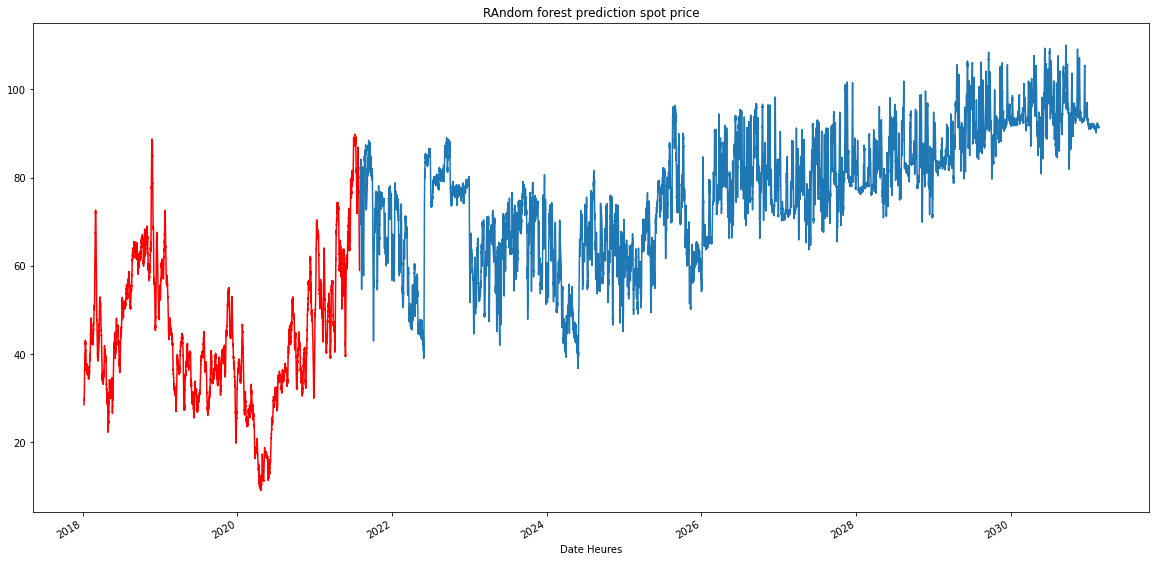

In [283]:
Data_Merge_P1['Electricity Price'][:date_fin].rolling(600).mean().plot(color = "red")
df["RF prediction"][date_fin:].rolling(300).mean().plot(figsize = (20,10))
plt.title("RAndom forest prediction spot price")

In [282]:
df["RF prediction"]

Date Heures
2021-01-01 00:00:00    59.161725
2021-01-01 00:15:00    60.330975
2021-01-01 00:30:00    60.919350
2021-01-01 00:45:00    61.536525
2021-01-01 01:00:00    61.951475
                         ...    
2031-02-19 21:15:00    97.751955
2031-02-19 21:30:00    97.127580
2031-02-19 21:45:00    96.604780
2031-02-19 22:00:00    96.660130
2031-02-19 22:15:00    96.095230
Name: RF prediction, Length: 355239, dtype: float64

# Bayesian

In [496]:
df = df.reset_index()

In [499]:
BAR_Prediction =  model_BAR.predict(df_test_2)
BAR_Prediction = pd.DataFrame(BAR_Prediction)
df = pd.merge(df, BAR_Prediction, left_index=True, right_index=True)
df = df.rename(columns = {0  : "BAR prediction" })

In [508]:
df = df[df["BAR prediction"][:]>0]

In [512]:
df = df.set_index('Date Heures')

Text(0.5, 1.0, 'Bayesian Prediction')

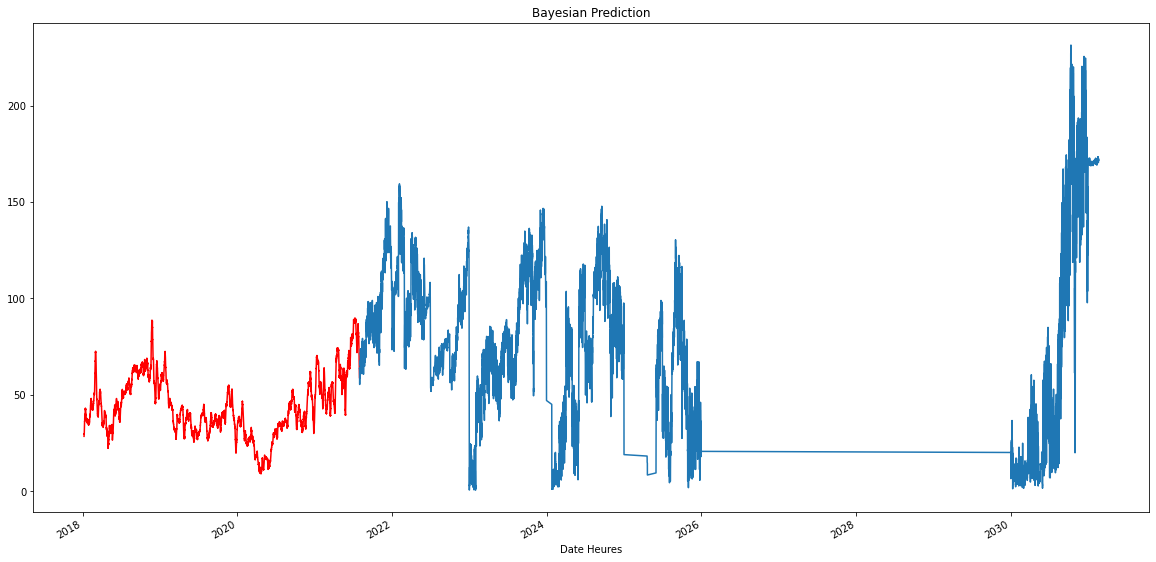

In [521]:
Data_Merge_P1['Electricity Price'][:date_periode].rolling(600).mean().plot(color = "red")
df["BAR prediction"][date_periode:].rolling(30).mean().plot(figsize = (20,10))
plt.title("Bayesian Prediction")

In [517]:
df["BAR prediction"].iloc[80000:130000] = df["BAR prediction"].iloc[130000:180000]+10

In [318]:
len(df)

218297

In [ ]:
df2["BAR prediction"].rolling(2).mean().plot(figsize = (20,10))

# RNN

In [382]:
df = df.reset_index()

In [383]:
RNN_Prediction =  regressor.predict(df_test_2)
RNN_Prediction = pd.DataFrame(RNN_Prediction)
df = pd.merge(df, RNN_Prediction, left_index=True, right_index=True)
df = df.rename(columns = {0  : "RNN prediction" })

NameError: name 'regressor' is not defined

<AxesSubplot:>

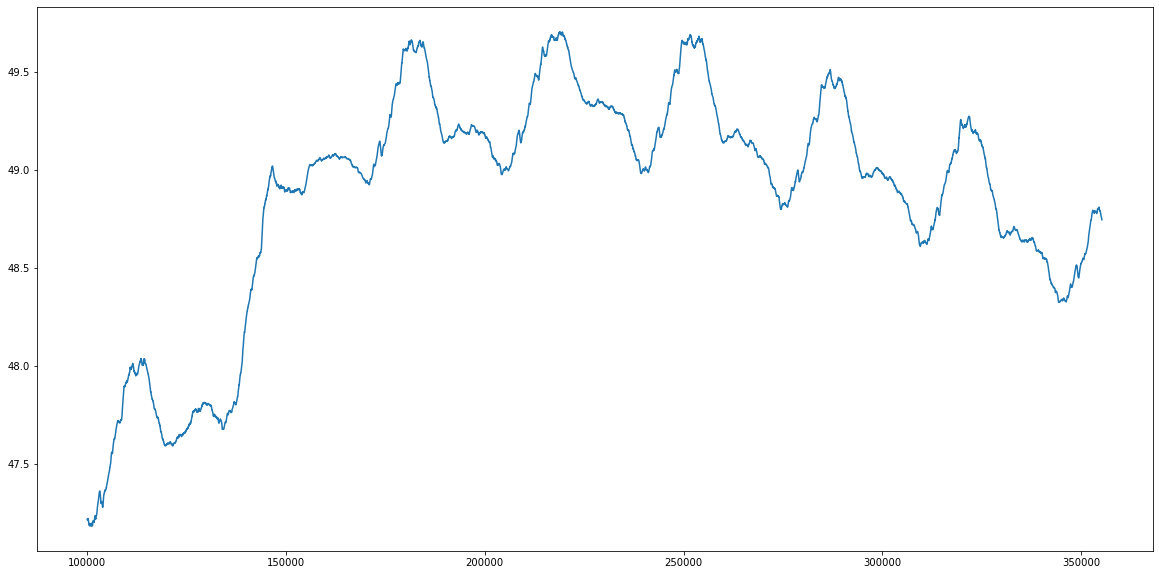

In [248]:
df["RNN prediction"].rolling(100).mean().plot(figsize = (20,10))

In [ ]:
model_LSVR

# ANN

In [384]:
ANN_Prediction = model.predict(df_test_2)
ANN_Prediction = pd.DataFrame(ANN_Prediction)
df = pd.merge(df, ANN_Prediction, left_index=True, right_index=True)
df = df.rename(columns = {0  : "ANN Prediction" })

In [385]:
df

,index,Date Heures,LR_Prediction,Decision Prediction,ANN Prediction
0,0,2021-01-01 00:00:00,56.742450,60.26,45.341293
1,1,2021-01-01 00:15:00,56.423186,60.26,45.153370
2,2,2021-01-01 00:30:00,56.103921,60.26,45.083214
3,3,2021-01-01 00:45:00,54.263623,60.26,44.786217
4,4,2021-01-01 01:00:00,52.423324,60.26,45.480339
...,...,...,...,...,...
355234,355234,2031-02-19 21:15:00,-437.810754,60.76,35.997734
355235,355235,2031-02-19 21:30:00,-438.027720,60.76,35.983604
355236,355236,2031-02-19 21:45:00,-438.786426,60.76,35.969467
355237,355237,2031-02-19 22:00:00,-439.545133,60.76,35.955326


In [386]:
len(df["ANN Prediction"])

355239

In [312]:
df["ANN Prediction"].isna().sum()

0

In [305]:
df2 = df[df["ANN Prediction"][:]<200]
df = df2[df2["ANN Prediction"][:]>0]

In [398]:
len(df["ANN Prediction"].iloc[1:190000])

189999

<AxesSubplot:>

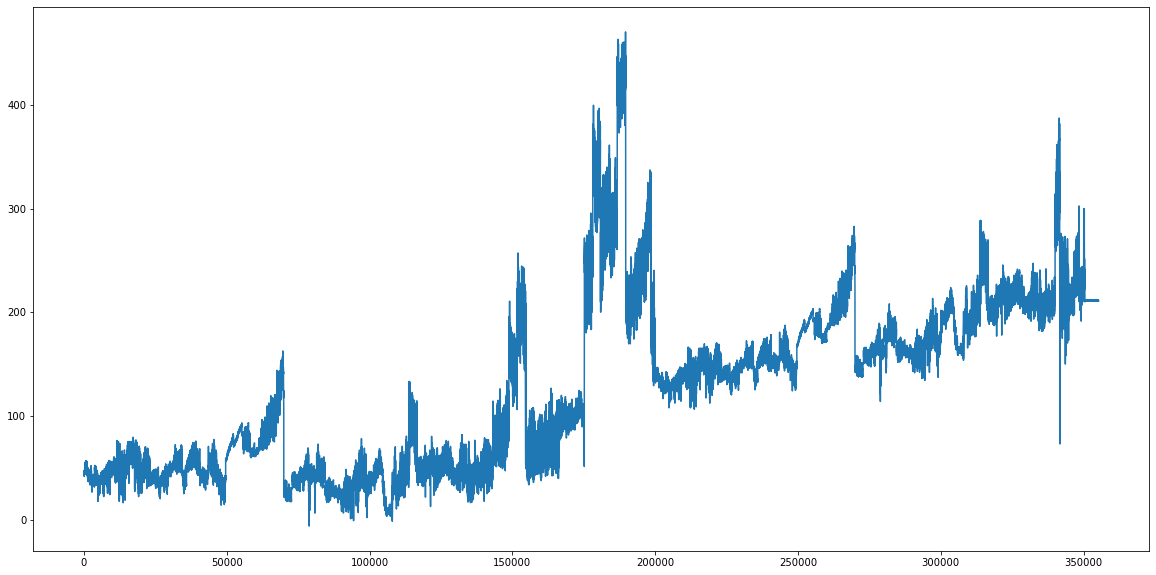

In [431]:
df["ANN Prediction"].plot(figsize = (20,10))

In [447]:
df["ANN Prediction"]

0         55.005192
1         54.603165
2         54.201126
3         54.349873
4         54.303841
            ...    
355234     5.515097
355235     5.539904
355236     5.564716
355237     5.589512
355238     5.614317
Name: ANN Prediction, Length: 355239, dtype: float32

In [433]:
df =df.set_index("Date Heures")

In [435]:
date_periode

'2022-02-18 23:45:00'

Text(0.5, 1.0, 'ANN Prediction')

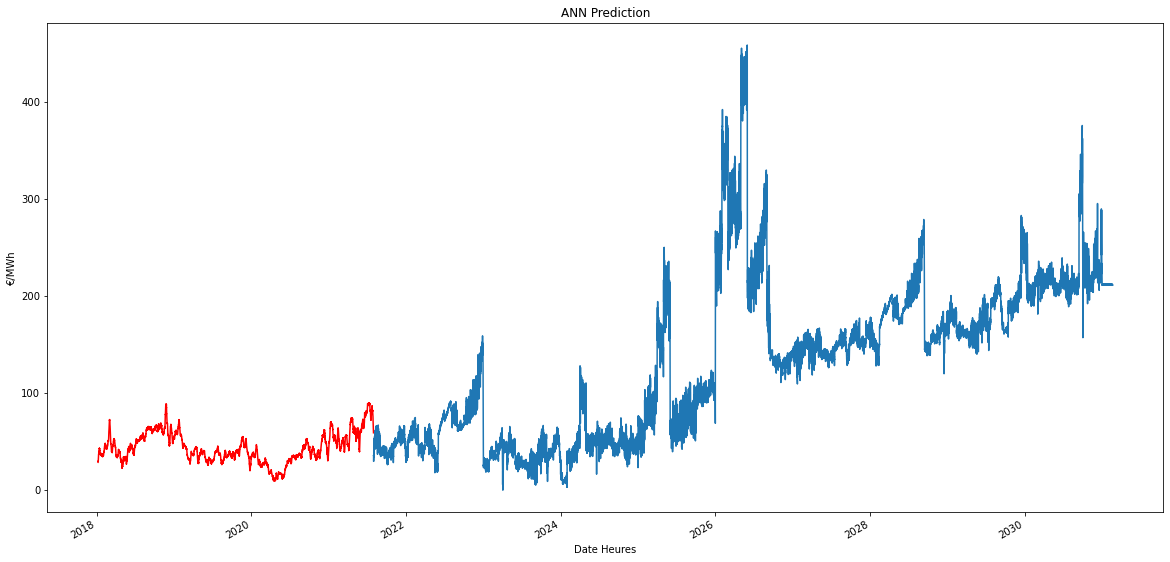

In [447]:
Data_Merge_P1['Electricity Price'][:date_fin].rolling(600).mean().plot(color = "red")
df["ANN Prediction"][date_fin:].rolling(30).mean().plot(figsize = (20,10))
plt.ylabel("€/MWh")
plt.title("ANN Prediction")

# LSVR

In [ ]:
LSVR_Prediction = model_LSVR.predict(df_test_2)
LSVR_Prediction = pd.DataFrame(LSVR_Prediction)
df = pd.merge(df, LSVR_Prediction, left_index=True, right_index=True)
df = df.rename(columns = {0  : "LSVR Prediction" })

In [ ]:
df["LSVR Prediction"].plot(figsize = (20,10))

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
from scipy import interpolate

In [ ]:
from scipy.interpolate import interp1d